# Humuhumunukunukuapua'a
Jacky Huynh, Rian Malapitan, Marisa Matsushima, Justin Mauricio-Orme, Bryant Thach

# Question
Does the amount of additional data filled in for a business(attributes, hours) increase more with the volume of reviews for that business or the length of time since their first review? Do businesses that closed have less data filled in?

# Introduction
 We must determine where our data will come from. We have decided that our data will come from both business.json and reviews.json which can be found from the Yelp Dataset Challenge found at https://www.yelp.com/dataset/challenge. We will need business id and # of reviews from both of these datasets.

Since the question is comparing if the number of reviews is due to the number of attributes filled out or is it because the length 

Since this question asks whether the number of reviews vs the age of the first review affect the business attribute completion, this would be a correlation problem. The best visualization to communicate our results would be a scatter plot. This will allow us to visualize all the businesses with their respective attributes filled out. From here we can dive deeper into our data by using box and whisker plots and line charts.



We decided to separate the yelp data by the most reviewed categories. From our data profile we discovered that most of the variables for businesses have a bias for restaurants. Therefore, we decided to separate the data by the most popular categories according to the 2017 Yelp 10K and select relevant attributes for the popular categories. For example, it would not make sense for a dentistry to serve alcohol.

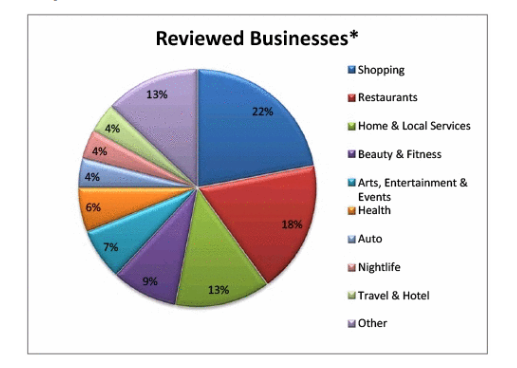

## Limitations
The limitation with this question is that we do not know when the attributes have been filled out for the business. The attributes data for each business is as of 2017, or when the business.json, was released. We would not be able to exactly compare the results with what caused the business to fill out their business attributes because we don’t have the information needed to fully answer the second part of the question.

The second part of our question looks at the year of the first review and the number of attributes filled out are in 2017. A business could have filled out half of their attributes in 2009 and added more in the following year. To create a better correlation between both questions, data such as when the business filled in additional attributes would be needed to create a better comparison 
 
Another limitation for this project is that not all categories will have the same fixed number of attributes. The attributes have a large bias for restaurants and there are many other categories that are non-restaurants. Thus, there are multiple attributes that will not apply for a certain businesses. We would need to select and filter out attributes that are only relevant to that specific category. There are over 1,000 specific categories in Yelp, but we only selected the top categories based on the 2017 Yelp 10K file. These top categories are the most reviewed and rates by people on yelp. 


# The Why?
This question is important to Yelp because it will answer the question if it is worth it to spend time adding and contributing to all of the attributes. If there is a correlation we would be able to inform small businesses to spend more time with their pages and fill everything out completely. But if there is no correlation to be found business owners can spend their time doing other stuff such as customer service or trying to gain new clients.

# Hypothesis
## Question 1
Our hypothesis is businesses will have more reviews if they fill out more attributes such as hours, accepts credit cards, and business hours. Customers will be more inclined to visit the business and review their experience if more attributes are filled out. This is because the business will have accurate information to allow users to filter out higher rated businesses to have the best experience.

## Question 2
Our hypothesis for our second question is that the length of time does affect the number of attributes filled out because if your yelp page has been open for a long time, the business would have developed a strong following or number of reviews. Therefore owners would want to maximize the information. They would be more inclined to take better care of their pages
## Question 3
The hypothesis for our third question is if the businesses are closed, they would have less information filled out. This is because customers would steer away from the business due to lack of information. This would cause less customers to go to the business.

In [3]:
# The code was removed by Watson Studio for sharing.

In [4]:

# Please read the documentation of PySpark to learn more about the possibilities to load data files.
# PySpark documentation: https://spark.apache.org/docs/2.0.1/api/python/pyspark.sql.html#pyspark.sql.SparkSession
# The SparkSession object is already initialized for you.
# The following variable contains the path to your file on your IBM Cloud Object Storage.
path_2 = cos.url('review.json.bz2', 'spring2018marisa38f9dcb923914cc9bd9c973540544bfe')


# Importing Files
Here, we are importing the business and review files into our notebook.


In [5]:
path_business = cos.url('business.json.bz2', 'spring2018marisa38f9dcb923914cc9bd9c973540544bfe')
df_business = spark.read.json(path_business)

In [6]:
path_review = cos.url('review.json.bz2', 'spring2018marisa38f9dcb923914cc9bd9c973540544bfe')
df_review = spark.read.json(path_review)


In [7]:
df_review.createOrReplaceTempView("review")
df_business.createOrReplaceTempView("business")

# Review Data
We want to see what kind of data is in the review file so we know what would be useful and what would not be useful when trying to prove our hypothesis. By printing out all of the columns in the file, it makes it easier to use when writing our code. 

Since we are trying to figure out how many reviews have been written based on the number of attributes, the business id and the review id would be useful from this file. 

In [8]:
df_review = spark.sql("""
SELECT *
FROM review
""")
df_review.show()

+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|      date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+----------+-----+--------------------+-----+--------------------+------+--------------------+
|0W4lkclzZThpx3V65...|   0|2016-05-28|    0|v0i_UHJMo_hPBq9bx...|    5|Love the staff, l...|     0|bv2nCi5Qv5vroFiqK...|
|AEx2SYEUJmTxVVB18...|   0|2016-05-28|    0|vkVSCC7xljjrAI4UG...|    5|Super simple plac...|     0|bv2nCi5Qv5vroFiqK...|
|VR6GpWIda3SfvPC-l...|   0|2016-05-28|    0|n6QzIUObkYshz4dz2...|    5|Small unassuming ...|     0|bv2nCi5Qv5vroFiqK...|
|CKC0-MOWMqoeWf6s-...|   0|2016-05-28|    0|MV3CcKScW05u5LVfF...|    5|Lester's is locat...|     0|bv2nCi5Qv5vroFiqK...|
|ACFtxLv8pGrrxMm6E...|   0|2016-05-28|    0|IXvOzsEMYtiJI0CAR...|    4|Love coming here....|     0|bv2nCi5Qv5vroFiqK...|
|s2I_Ni76bjJNK9yG6...|   0|2016-

#  Counting the Reviews
We want to count how many reviews each business has so we can figure out if the number of filled out attributes correlates. We can figure out how many reviews each business has by pulling the business id and review id from the review file. We simply do a count function with the review id's and group it by business id's. Later, we will compare these results with the number of attributes each business has. 

This data shows us the businesses with the most reviews. We want to see where the limit is for the businesses before comparing the attributes to the review.

In [9]:
df_count_review = spark.sql("""
SELECT business_id, count(review_id) AS num_reviews
FROM review
GROUP BY business_id
ORDER BY num_reviews DESC
""")
df_count_review.show()

+--------------------+-----------+
|         business_id|num_reviews|
+--------------------+-----------+
|4JNXUYY8wbaaDmk3B...|       7362|
|RESDUcs7fIiihp38-...|       7006|
|K7lWdNUhCbcnEvI0N...|       5951|
|cYwJA2A6I12KNkm2r...|       5448|
|DkYS3arLOhA8si5uU...|       4870|
|f4x1YBxkLrZg652xt...|       4774|
|2weQS-RnoOBhb1KsH...|       4018|
|KskYqH1Bi7Z_61pH6...|       3965|
|eoHdUeQDNgQ6WYEnP...|       3911|
|ujHiaprwCQ5ewziu0...|       3836|
|SMPbvZLSMMb7KU76Y...|       3794|
|5LNZ67Yw9RD6nf4_U...|       3772|
|iCQpiavjjPzJ5_3gP...|       3741|
|AV6weBrZFFBfRGCbc...|       3623|
|rcaPajgKOJC2vo_l3...|       3571|
|El4FC8jcawUVgw_0E...|       3445|
|FaHADZARwnY4yvlvp...|       3287|
|hihud--QRriCYZw1z...|       3264|
|Wxxvi3LZbHNIDwJ-Z...|       3103|
|7sPNbCx7vGAaH7SbN...|       3064|
+--------------------+-----------+
only showing top 20 rows



# Creating Categories

We have decided that it would be easier to split the businesses into different categories. The categories we chose were: Shopping, Restaurants, Home and Local Services, and Arts & Entertainment. We chose these 4 categories because they were the top 4 categories based on the 2017 Yelp 10k. We figured that businesses with the same categories would have more of the same attributes filled out. For example, a business in the Shopping category would probably not have the attribute "takeout", like a business in the Restaurant cateogry would. So by dividing the business into categories, it would give us more accurate results to help us prove our hypothesis. We will be pulling this data from the business file.


In [10]:
df_businesses_by_top_4 = spark.sql("""
SELECT business_id,        
       ARRAY_CONTAINS(categories, "Shopping") AS is_shopping,
       ARRAY_CONTAINS(categories, "Restaurants") AS is_restaurants,
       ARRAY_CONTAINS(categories, "Local Services") OR ARRAY_CONTAINS(categories, "Home Services")  AS is_Home_Service,
       ARRAY_CONTAINS(categories, "Arts & Entertainment") AS is_arts_and_ent, 
       attributes, hours, review_count

FROM business
""")
df_businesses_by_top_4.createOrReplaceTempView("businesses_by_top_4")
df_businesses_by_top_4.show(truncate=False)


+----------------------+-----------+--------------+---------------+---------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------+------------+
|business_id           |is_shopping|is_restaurants|is_Home_Service|is_arts_and_ent|attributes                                                                                                                                                                                                                                                                                                                                           

# Converting Our Values
First, we will be dealing with the business data. We need to figure out how many attributes are filled out by each business to see if the number of reviews correlate. Since the attributes are filled out with different data types (booleans, numbers, strings, etc.) we need to figure out a way to count all of the attributes. We decided to define a value that is NOT null as an attribute that IS filled out and a NULL value as an attribute that is NOT filled out. The not null values would be converted to 1's and null values as 0's. 

Creating 1's and 0's for the null and not null values allow us to count how many attributes a business has filled out in the end. 

This is will be applied for all businesses in all categories for us to visualize how many attributes the business has filled out. 




In [11]:
df_all_business = spark.sql("""


SELECT business_id,

CASE WHEN attributes.BusinessAcceptsCreditCards IS NULL THEN 0 ELSE 1 END AS CreditCard,

CASE WHEN attributes.AcceptsInsurance IS NULL THEN 0 ELSE 1 END AS AcceptsInsurance,

CASE WHEN attributes.AgesAllowed IS NULL THEN 0 ELSE 1 END AS AgesAllowed,

CASE WHEN attributes.alcohol IS NULL THEN 0 ELSE 1 END AS Alcohol,

CASE WHEN attributes.Ambience.casual IS NULL AND
          attributes.Ambience.classy IS NULL AND
          attributes.Ambience.divey IS NULL AND
          attributes.Ambience.hipster IS NULL AND
          attributes.Ambience.intimate IS NULL AND
          attributes.Ambience.romantic IS NULL AND
          attributes.Ambience.touristy IS NULL AND
          attributes.Ambience.trendy IS NULL AND
          attributes.Ambience.upscale IS NULL
THEN 0 ELSE 1 END AS Ambience,

CASE WHEN attributes.BYOB IS NULL THEN 0 ELSE 1 END AS BYOB,

CASE WHEN attributes.BYOBCorkage IS NULL THEN 0 ELSE 1 END AS BYOBCorkage,

CASE WHEN attributes.BestNights.friday IS NULL AND
          attributes.BestNights.monday IS NULL AND
          attributes.BestNights.saturday IS NULL AND
          attributes.BestNights.thursday IS NULL AND
          attributes.BestNights.tuesday IS NULL AND
          attributes.BestNights.wednesday IS NULL AND
          attributes.BestNights.sunday IS NULL
THEN 0 ELSE 1 END AS BestNights,

CASE WHEN attributes.BikeParking IS NULL THEN 0 ELSE 1 END AS BikeParking,

CASE WHEN attributes.BusinessAcceptsBitcoin IS NULL THEN 0 ELSE 1 END AS AcceptsBitcoin,

CASE WHEN attributes.ByAppointmentOnly IS NULL THEN 0 ELSE 1 END AS Appointment,

CASE WHEN attributes.Caters IS NULL THEN 0 ELSE 1 END AS Caters,

CASE WHEN attributes.CoatCheck IS NULL THEN 0 ELSE 1 END AS CoatCheck,

CASE WHEN attributes.Corkage IS NULL THEN 0 ELSE 1 END AS Corkage,

CASE WHEN attributes.DietaryRestrictions IS NULL THEN 0 ELSE 1 END AS DietaryRestrictions,

CASE WHEN attributes.DogsAllowed IS NULL THEN 0 ELSE 1 END AS Dogs,

CASE WHEN attributes.DriveThru IS NULL THEN 0 ELSE 1 END AS DriveThru,

CASE WHEN attributes.GoodForDancing IS NULL THEN 0 ELSE 1 END AS Dancing,

CASE WHEN attributes.GoodForKids IS NULL THEN 0 ELSE 1 END AS Kids,

CASE WHEN attributes.GoodForMeal.breakfast IS NULL AND
          attributes.GoodForMeal.brunch IS NULL AND
          attributes.GoodForMeal.dessert IS NULL AND
          attributes.GoodForMeal.dinner IS NULL AND
          attributes.GoodForMeal.latenight IS NULL AND
          attributes.GoodForMeal.lunch IS NULL 
THEN 0 ELSE 1 END AS Meal,

CASE WHEN attributes.HappyHour IS NULL THEN 0 ELSE 1 END AS HappyHour,

CASE WHEN attributes.HasTV IS NULL THEN 0 ELSE 1 END AS HasTV,

CASE WHEN attributes.Music.background_music IS NULL AND
          attributes.Music.dj IS NULL AND
          attributes.Music.jukebox IS NULL AND
          attributes.Music.karaoke IS NULL AND
          attributes.Music.live IS NULL AND
          attributes.Music.no_music IS NULL AND
          attributes.Music.video IS NULL
THEN 0 ELSE 1 END AS Music,

CASE WHEN attributes.NoiseLevel IS NULL THEN 0 ELSE 1 END AS NoiseLevel,

CASE WHEN attributes.Open24Hours IS NULL THEN 0 ELSE 1 END AS Open24Hours,

CASE WHEN attributes.OutdoorSeating IS NULL THEN 0 ELSE 1 END AS OutdoorSeating,

CASE WHEN hours.monday IS NULL AND
          hours.tuesday IS NULL AND
          hours.wednesday IS NULL AND
          hours.thursday IS NULL AND
          hours.friday IS NULL AND
          hours.saturday IS NULL AND
          hours.sunday IS NULL
THEN 0 ELSE 1 END AS Hours,

CASE WHEN attributes.BusinessParking.garage IS NULL AND
          attributes.BusinessParking.lot IS NULL AND
          attributes.BusinessParking.street IS NULL AND
          attributes.BusinessParking.valet IS NULL AND
          attributes.BusinessParking.validated IS NULL
THEN 0 ELSE 1 END AS Parking,

CASE WHEN attributes.WiFi IS NULL THEN 0 ELSE 1 END AS Wifi,

CASE WHEN attributes.smoking IS NULL THEN 0 ELSE 1 END AS Smoking,

CASE WHEN attributes.WheelchairAccessible IS NULL THEN 0 ELSE 1 END AS WheelchairAccessible,

CASE WHEN attributes.RestaurantsAttire IS NULL THEN 0 ELSE 1 END AS Attire,

CASE WHEN attributes.RestaurantsCounterService IS NULL THEN 0 ELSE 1 END AS CounterService,

CASE WHEN attributes.RestaurantsGoodForGroups IS NULL THEN 0 ELSE 1 END AS Groups,

CASE WHEN attributes.RestaurantsPriceRange2 IS NULL THEN 0 ELSE 1 END AS PriceRange,

CASE WHEN attributes.RestaurantsReservations IS NULL THEN 0 ELSE 1 END AS Reservations,

CASE WHEN attributes.RestaurantsTableService IS NULL THEN 0 ELSE 1 END AS TableService,

CASE WHEN attributes.RestaurantsTakeout IS NULL THEN 0 ELSE 1 END AS Takeout, 

review_count


FROM business


""")
df_all_business.createOrReplaceTempView("all_business")
df_all_business.show(5)

+--------------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+------+---------+-------+-------------------+----+---------+-------+----+----+---------+-----+-----+----------+-----------+--------------+-----+-------+----+-------+--------------------+------+--------------+------+----------+------------+------------+-------+------------+
|         business_id|CreditCard|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|AcceptsBitcoin|Appointment|Caters|CoatCheck|Corkage|DietaryRestrictions|Dogs|DriveThru|Dancing|Kids|Meal|HappyHour|HasTV|Music|NoiseLevel|Open24Hours|OutdoorSeating|Hours|Parking|Wifi|Smoking|WheelchairAccessible|Attire|CounterService|Groups|PriceRange|Reservations|TableService|Takeout|review_count|
+--------------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+------+-------

# Totaling the Attributes
Now that we have converted our values, we need to sum them up. Summing up our values will give us the total number of attributes each business has filled out. Once we have the total number of attributes for each business, we can throw this data into Tableau to show the comparison between the total attributes and the number of reviews per business. 

In [12]:
df_AllBusAttr_totals = spark.sql("""
SELECT business_id, review_count, CreditCard, AcceptsInsurance, AgesAllowed, Alcohol, Ambience, BYOB, BYOBCorkage, BestNights, BikeParking, AcceptsBitcoin, Appointment, Caters, Coatcheck, Corkage, DietaryRestrictions, Dogs, DriveThru, Dancing, Kids, Meal, HappyHour, HasTV, Music, NoiseLevel, Open24Hours, OutdoorSeating, hours, Parking, Wifi, Smoking, WheelchairAccessible, Attire, CounterService, Groups,PriceRange,Reservations,TableService,Takeout,  
(CreditCard+AcceptsInsurance+AgesAllowed+Alcohol+Ambience+BYOB+BYOBCorkage+BestNights+BikeParking+AcceptsBitcoin+Appointment+Caters+Coatcheck+Corkage+DietaryRestrictions+Dogs+DriveThru+Dancing+Kids+Meal+HappyHour+HasTV+Music+NoiseLevel+Open24Hours+OutdoorSeating+Hours+Parking+Wifi+Smoking+WheelchairAccessible+Attire+CounterService+Groups+PriceRange+Reservations+TableService+Takeout) as TOTAL
from all_business
""")
df_AllBusAttr_totals.createOrReplaceTempView("AllBusAttr_totals")
df_AllBusAttr_totals.show(truncate=False)

+----------------------+------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+------+---------+-------+-------------------+----+---------+-------+----+----+---------+-----+-----+----------+-----------+--------------+-----+-------+----+-------+--------------------+------+--------------+------+----------+------------+------------+-------+-----+
|business_id           |review_count|CreditCard|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|AcceptsBitcoin|Appointment|Caters|Coatcheck|Corkage|DietaryRestrictions|Dogs|DriveThru|Dancing|Kids|Meal|HappyHour|HasTV|Music|NoiseLevel|Open24Hours|OutdoorSeating|hours|Parking|Wifi|Smoking|WheelchairAccessible|Attire|CounterService|Groups|PriceRange|Reservations|TableService|Takeout|TOTAL|
+----------------------+------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+----------

## Results

Now that we have the total number of attributes and reviews for each business, we throw our data into tableau to visualize our results. We decided that a scatter plot would best demonstrate the correlation between the number of attributes and reviews a business has. We assigned the number of attributes as our x-axis, number of reviews as our y-axis, and each point on our scatter plot as a business id.

The graph below shows that businesses had a significant increase in reviews after filling out attributes 19.

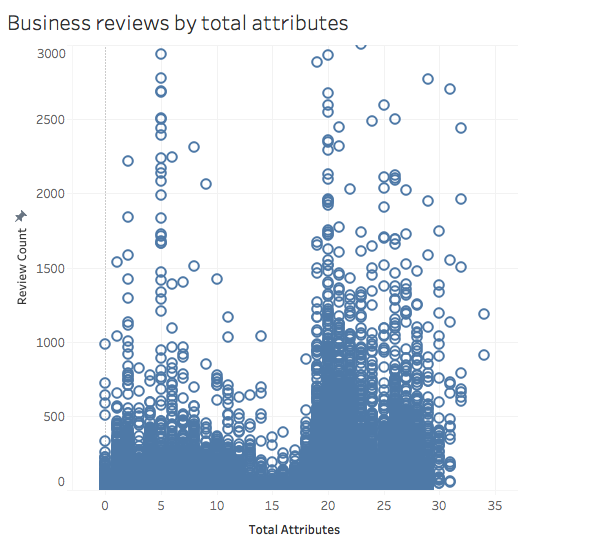

## Restaurants

Now that we have an overview for all businesses, we went deeper by looking into the restaurants category.

We decided to include all the attributes in the data for restaurants, but exclude very irrelevent ones. For example, we excluded the attribute "Hair Specializes In" because we know for a fact that restaurants would not have that attribute filled out. 


In [13]:
df_counter_RestAttr = spark.sql("""
SELECT business_id, 

CASE WHEN attributes.BusinessAcceptsCreditCards IS NULL THEN 0 ELSE 1 END AS CreditCard,

CASE WHEN attributes.AcceptsInsurance IS NULL THEN 0 ELSE 1 END AS AcceptsInsurance,

CASE WHEN attributes.AgesAllowed IS NULL THEN 0 ELSE 1 END AS AgesAllowed,

CASE WHEN attributes.alcohol IS NULL THEN 0 ELSE 1 END AS Alcohol,

CASE WHEN attributes.Ambience.casual IS NULL AND
          attributes.Ambience.classy IS NULL AND
          attributes.Ambience.divey IS NULL AND
          attributes.Ambience.hipster IS NULL AND
          attributes.Ambience.intimate IS NULL AND
          attributes.Ambience.romantic IS NULL AND
          attributes.Ambience.touristy IS NULL AND
          attributes.Ambience.trendy IS NULL AND
          attributes.Ambience.upscale IS NULL
THEN 0 ELSE 1 END AS Ambience,

CASE WHEN attributes.BYOB IS NULL THEN 0 ELSE 1 END AS BYOB,

CASE WHEN attributes.BYOBCorkage IS NULL THEN 0 ELSE 1 END AS BYOBCorkage,

CASE WHEN attributes.BestNights.friday IS NULL AND
          attributes.BestNights.monday IS NULL AND
          attributes.BestNights.saturday IS NULL AND
          attributes.BestNights.thursday IS NULL AND
          attributes.BestNights.tuesday IS NULL AND
          attributes.BestNights.wednesday IS NULL AND
          attributes.BestNights.sunday IS NULL
THEN 0 ELSE 1 END AS BestNights,

CASE WHEN attributes.BikeParking IS NULL THEN 0 ELSE 1 END AS BikeParking,

CASE WHEN attributes.BusinessAcceptsBitcoin IS NULL THEN 0 ELSE 1 END AS AcceptsBitcoin,

CASE WHEN attributes.ByAppointmentOnly IS NULL THEN 0 ELSE 1 END AS Appointment,

CASE WHEN attributes.Caters IS NULL THEN 0 ELSE 1 END AS Caters,

CASE WHEN attributes.CoatCheck IS NULL THEN 0 ELSE 1 END AS CoatCheck,

CASE WHEN attributes.Corkage IS NULL THEN 0 ELSE 1 END AS Corkage,

CASE WHEN attributes.DietaryRestrictions IS NULL THEN 0 ELSE 1 END AS DietaryRestrictions,

CASE WHEN attributes.DogsAllowed IS NULL THEN 0 ELSE 1 END AS Dogs,

CASE WHEN attributes.DriveThru IS NULL THEN 0 ELSE 1 END AS DriveThru,

CASE WHEN attributes.GoodForDancing IS NULL THEN 0 ELSE 1 END AS Dancing,

CASE WHEN attributes.GoodForKids IS NULL THEN 0 ELSE 1 END AS Kids,

CASE WHEN attributes.GoodForMeal.breakfast IS NULL AND
          attributes.GoodForMeal.brunch IS NULL AND
          attributes.GoodForMeal.dessert IS NULL AND
          attributes.GoodForMeal.dinner IS NULL AND
          attributes.GoodForMeal.latenight IS NULL AND
          attributes.GoodForMeal.lunch IS NULL 
THEN 0 ELSE 1 END AS Meal,

CASE WHEN attributes.HappyHour IS NULL THEN 0 ELSE 1 END AS HappyHour,

CASE WHEN attributes.HasTV IS NULL THEN 0 ELSE 1 END AS HasTV,

CASE WHEN attributes.Music.background_music IS NULL AND
          attributes.Music.dj IS NULL AND
          attributes.Music.jukebox IS NULL AND
          attributes.Music.karaoke IS NULL AND
          attributes.Music.live IS NULL AND
          attributes.Music.no_music IS NULL AND
          attributes.Music.video IS NULL
THEN 0 ELSE 1 END AS Music,

CASE WHEN attributes.NoiseLevel IS NULL THEN 0 ELSE 1 END AS NoiseLevel,

CASE WHEN attributes.Open24Hours IS NULL THEN 0 ELSE 1 END AS Open24Hours,

CASE WHEN attributes.OutdoorSeating IS NULL THEN 0 ELSE 1 END AS OutdoorSeating,

CASE WHEN hours.monday IS NULL AND
          hours.tuesday IS NULL AND
          hours.wednesday IS NULL AND
          hours.thursday IS NULL AND
          hours.friday IS NULL AND
          hours.saturday IS NULL AND
          hours.sunday IS NULL
THEN 0 ELSE 1 END AS Hours,

CASE WHEN attributes.BusinessParking.garage IS NULL AND
          attributes.BusinessParking.lot IS NULL AND
          attributes.BusinessParking.street IS NULL AND
          attributes.BusinessParking.valet IS NULL AND
          attributes.BusinessParking.validated IS NULL
THEN 0 ELSE 1 END AS Parking,

CASE WHEN attributes.WiFi IS NULL THEN 0 ELSE 1 END AS Wifi,

CASE WHEN attributes.smoking IS NULL THEN 0 ELSE 1 END AS Smoking,

CASE WHEN attributes.WheelchairAccessible IS NULL THEN 0 ELSE 1 END AS WheelchairAccessible,

CASE WHEN attributes.RestaurantsAttire IS NULL THEN 0 ELSE 1 END AS Attire,

CASE WHEN attributes.RestaurantsCounterService IS NULL THEN 0 ELSE 1 END AS CounterService,

CASE WHEN attributes.RestaurantsGoodForGroups IS NULL THEN 0 ELSE 1 END AS Groups,

CASE WHEN attributes.RestaurantsPriceRange2 IS NULL THEN 0 ELSE 1 END AS PriceRange,

CASE WHEN attributes.RestaurantsReservations IS NULL THEN 0 ELSE 1 END AS Reservations,

CASE WHEN attributes.RestaurantsTableService IS NULL THEN 0 ELSE 1 END AS TableService,

CASE WHEN attributes.RestaurantsTakeout IS NULL THEN 0 ELSE 1 END AS Takeout, 

review_count



FROM businesses_by_top_4
WHERE is_restaurants = True

""")
df_counter_RestAttr.show(truncate=False)

df_counter_RestAttr.createOrReplaceTempView("restaurants")

+----------------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+------+---------+-------+-------------------+----+---------+-------+----+----+---------+-----+-----+----------+-----------+--------------+-----+-------+----+-------+--------------------+------+--------------+------+----------+------------+------------+-------+------------+
|business_id           |CreditCard|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|AcceptsBitcoin|Appointment|Caters|CoatCheck|Corkage|DietaryRestrictions|Dogs|DriveThru|Dancing|Kids|Meal|HappyHour|HasTV|Music|NoiseLevel|Open24Hours|OutdoorSeating|Hours|Parking|Wifi|Smoking|WheelchairAccessible|Attire|CounterService|Groups|PriceRange|Reservations|TableService|Takeout|review_count|
+----------------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+------+-

## Totaling Attributes

We then counted up the attributes with a "1" for the Restaurants category. 

In [14]:
df_RestAttr_totals = spark.sql("""
SELECT business_id, review_count, CreditCard, AcceptsInsurance, AgesAllowed, Alcohol, Ambience, BYOB, BYOBCorkage, BestNights, BikeParking, AcceptsBitcoin, Appointment, Caters, Coatcheck, Corkage, DietaryRestrictions, Dogs, DriveThru, Dancing, Kids, Meal, HappyHour, HasTV, Music, NoiseLevel, Open24Hours, OutdoorSeating, hours, Parking, Wifi, Smoking, WheelchairAccessible, Attire, CounterService, Groups,PriceRange,Reservations,TableService,Takeout,  
(CreditCard+AcceptsInsurance+AgesAllowed+Alcohol+Ambience+BYOB+BYOBCorkage+BestNights+BikeParking+AcceptsBitcoin+Appointment+Caters+Coatcheck+Corkage+DietaryRestrictions+Dogs+DriveThru+Dancing+Kids+Meal+HappyHour+HasTV+Music+NoiseLevel+Open24Hours+OutdoorSeating+Hours+Parking+Wifi+Smoking+WheelchairAccessible+Attire+CounterService+Groups+PriceRange+Reservations+TableService+Takeout) as TOTAL
from restaurants
""")
df_RestAttr_totals.createOrReplaceTempView("restAttr_totals")
df_RestAttr_totals.show(truncate=False)


+----------------------+------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+------+---------+-------+-------------------+----+---------+-------+----+----+---------+-----+-----+----------+-----------+--------------+-----+-------+----+-------+--------------------+------+--------------+------+----------+------------+------------+-------+-----+
|business_id           |review_count|CreditCard|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|AcceptsBitcoin|Appointment|Caters|Coatcheck|Corkage|DietaryRestrictions|Dogs|DriveThru|Dancing|Kids|Meal|HappyHour|HasTV|Music|NoiseLevel|Open24Hours|OutdoorSeating|hours|Parking|Wifi|Smoking|WheelchairAccessible|Attire|CounterService|Groups|PriceRange|Reservations|TableService|Takeout|TOTAL|
+----------------------+------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+----------

# Restaurant Results
The graph shows that there is a correlation between the number of attributes filled out and the number of reviews. It shows that a majority of restaurants fill out between 20-30 attributes on average and get the most reviews. Our hypothesis was close. The graph shows an increase in reviews when restaurants fill out more than 15 attributes, but does not necessarily show that the more attributes a business fills out, the more reviews they get.

The second graph shows the box and whiskers plot displaying the number attributes on the y-axis and review count on the x-axis. We seperated the attributes by three different tiers which are 0-10, 11-20, and 21-33 attributes filled for each business. Businesses with 21-33 attributes have a larger bin compared to the other tiers. Businesses with 0-10 attribute have the lowest review count compared to the businesses with 11 or more attributes filled.

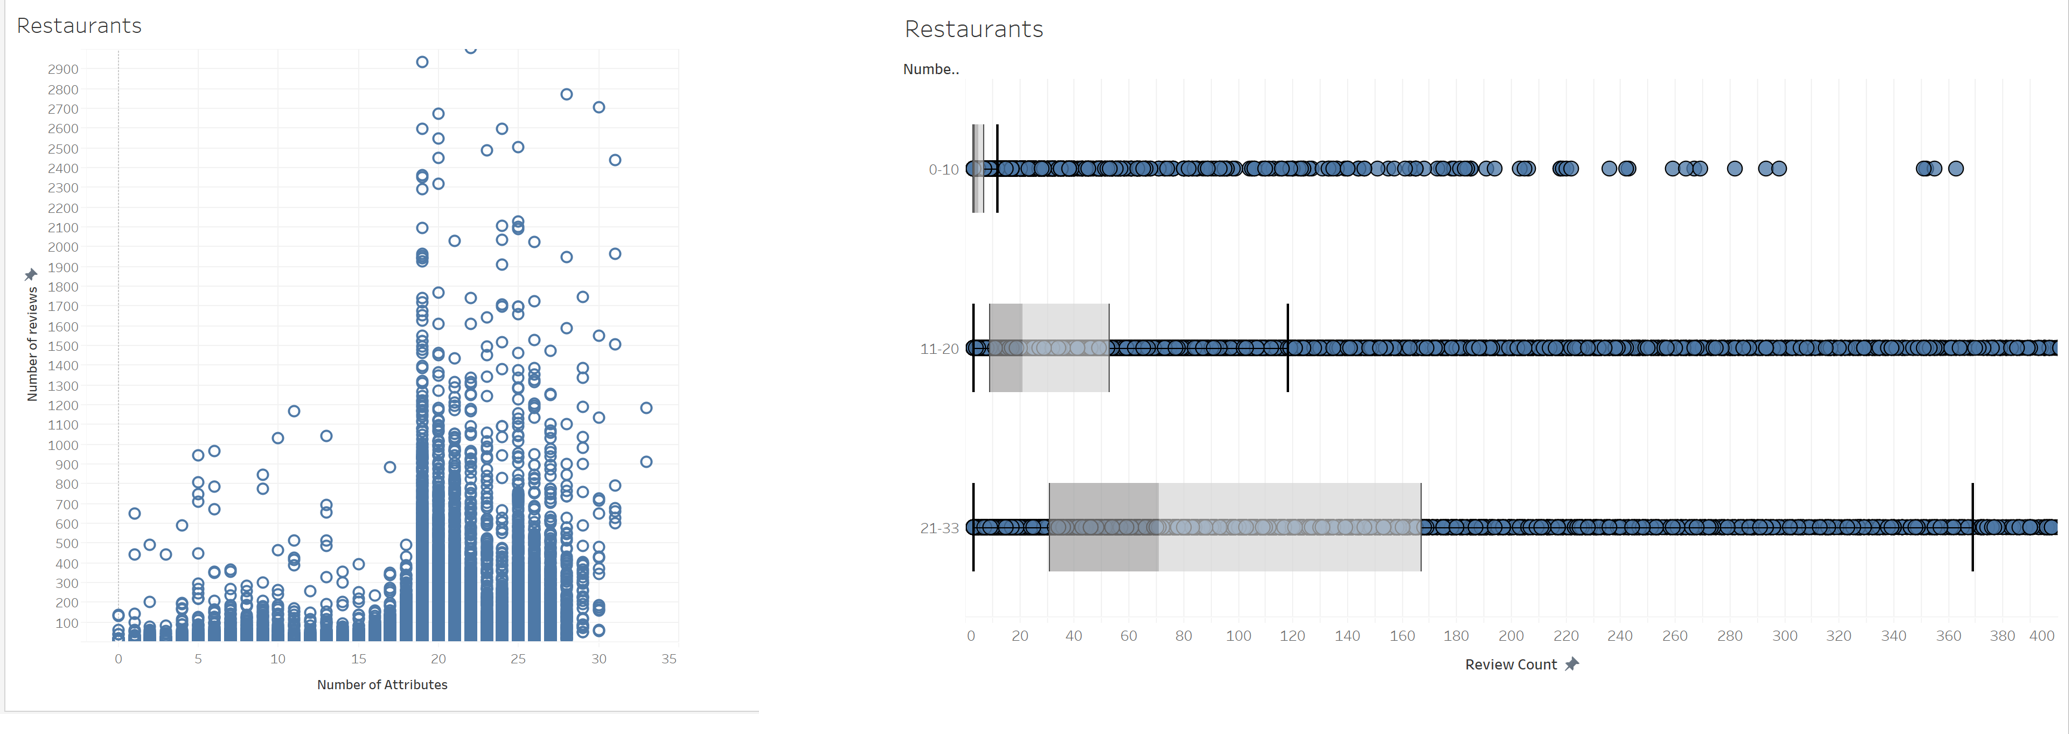


# Shopping Category 

We found that there were 15 attributes relevent to the shopping category. The shopping catgory attributes is significantly smaller than the restaurant attributes because there are a significant number of attributes that only apply to restaurants. We then excludeded other attributes that absolutely did not make sense to have for shopping businesses.


In [15]:
df_counter_ShoppingAttr = spark.sql("""
SELECT business_id,

CASE WHEN attributes.BusinessAcceptsCreditCards IS NULL THEN 0 ELSE 1 END AS CreditCard,

CASE WHEN attributes.AcceptsInsurance IS NULL THEN 0 ELSE 1 END AS AcceptsInsurance,

CASE WHEN attributes.AgesAllowed IS NULL THEN 0 ELSE 1 END AS AgesAllowed,

CASE WHEN attributes.Ambience.casual IS NULL AND
          attributes.Ambience.classy IS NULL AND
          attributes.Ambience.divey IS NULL AND
          attributes.Ambience.hipster IS NULL AND
          attributes.Ambience.intimate IS NULL AND
          attributes.Ambience.romantic IS NULL AND
          attributes.Ambience.touristy IS NULL AND
          attributes.Ambience.trendy IS NULL AND
          attributes.Ambience.upscale IS NULL
THEN 0 ELSE 1 END AS Ambience,

CASE WHEN attributes.BestNights.friday IS NULL AND
          attributes.BestNights.monday IS NULL AND
          attributes.BestNights.saturday IS NULL AND
          attributes.BestNights.thursday IS NULL AND
          attributes.BestNights.tuesday IS NULL AND
          attributes.BestNights.wednesday IS NULL AND
          attributes.BestNights.sunday IS NULL
THEN 0 ELSE 1 END AS BestNights,

CASE WHEN attributes.BikeParking IS NULL THEN 0 ELSE 1 END AS BikeParking,

CASE WHEN attributes.BusinessAcceptsBitcoin IS NULL THEN 0 ELSE 1 END AS AcceptsBitcoin,

CASE WHEN attributes.ByAppointmentOnly IS NULL THEN 0 ELSE 1 END AS Appointment,

CASE WHEN attributes.DogsAllowed IS NULL THEN 0 ELSE 1 END AS Dogs,

CASE WHEN attributes.GoodForKids IS NULL THEN 0 ELSE 1 END AS Kids,

CASE WHEN hours.monday IS NULL AND
          hours.tuesday IS NULL AND
          hours.wednesday IS NULL AND
          hours.thursday IS NULL AND
          hours.friday IS NULL AND
          hours.saturday IS NULL AND
          hours.sunday IS NULL
THEN 0 ELSE 1 END AS Hours,

CASE WHEN attributes.BusinessParking.garage IS NULL AND
          attributes.BusinessParking.lot IS NULL AND
          attributes.BusinessParking.street IS NULL AND
          attributes.BusinessParking.valet IS NULL AND
          attributes.BusinessParking.validated IS NULL
THEN 0 ELSE 1 END AS Parking,

CASE WHEN attributes.WiFi IS NULL THEN 0 ELSE 1 END AS Wifi,

CASE WHEN attributes.smoking IS NULL THEN 0 ELSE 1 END AS Smoking, 

CASE WHEN attributes.WheelchairAccessible IS NULL THEN 0 ELSE 1 END AS WheelchairAccessible,

review_count


FROM businesses_by_top_4
WHERE is_shopping = True

""")
df_counter_ShoppingAttr.show(truncate=False)

df_counter_ShoppingAttr.createOrReplaceTempView("shopping")

+----------------------+----------+----------------+-----------+--------+----------+-----------+--------------+-----------+----+----+-----+-------+----+-------+--------------------+------------+
|business_id           |CreditCard|AcceptsInsurance|AgesAllowed|Ambience|BestNights|BikeParking|AcceptsBitcoin|Appointment|Dogs|Kids|Hours|Parking|Wifi|Smoking|WheelchairAccessible|review_count|
+----------------------+----------+----------------+-----------+--------+----------+-----------+--------------+-----------+----+----+-----+-------+----+-------+--------------------+------------+
|8DShNS-LuFqpEWIp0HxijA|1         |0               |0          |0       |0         |1          |0             |0          |0   |0   |1    |1      |0   |0      |0                   |9           |
|OD2hnuuTJI9uotcKycxg1A|1         |0               |0          |0       |0         |1          |0             |0          |0   |0   |1    |1      |0   |0      |1                   |9           |
|94KziT6DQ9XlBET3WzIv_w|1

## Totaling the attributes for Shopping Category

We then get a total count for the shopping category attributes.

In [16]:
df_ShoppingAttr_totals = spark.sql("""
SELECT business_id, review_count, CreditCard, AcceptsInsurance, AgesAllowed, Ambience, BestNights, BikeParking, AcceptsBitcoin, Appointment, Dogs, Parking, Wifi, WheelchairAccessible, Hours, Smoking, 
(CreditCard+AcceptsInsurance+AgesAllowed+Ambience+BestNights+BikeParking+AcceptsBitcoin+Appointment+Dogs+Parking+Wifi+WheelchairAccessible+Hours+Smoking) as TOTAL 
FROM shopping
""")
df_ShoppingAttr_totals.createOrReplaceTempView("ShoppingAttr_totals")
df_ShoppingAttr_totals.show(5)


+--------------------+------------+----------+----------------+-----------+--------+----------+-----------+--------------+-----------+----+-------+----+--------------------+-----+-------+-----+
|         business_id|review_count|CreditCard|AcceptsInsurance|AgesAllowed|Ambience|BestNights|BikeParking|AcceptsBitcoin|Appointment|Dogs|Parking|Wifi|WheelchairAccessible|Hours|Smoking|TOTAL|
+--------------------+------------+----------+----------------+-----------+--------+----------+-----------+--------------+-----------+----+-------+----+--------------------+-----+-------+-----+
|8DShNS-LuFqpEWIp0...|           9|         1|               0|          0|       0|         0|          1|             0|          0|   0|      1|   0|                   0|    1|      0|    4|
|OD2hnuuTJI9uotcKy...|           9|         1|               0|          0|       0|         0|          1|             0|          0|   0|      1|   0|                   1|    1|      0|    5|
|94KziT6DQ9XlBET3W...|        

# Shopping Results 
The graph shows that there is a correlation between the number of attributes filled out and the number of reviews. It shows that a majority of shopping fill out between 4-7 attributes on average and get the most reviews. The graph shows an increase in reviews when shopping fill out somewhere between 4-7 attributes, but does not necessarily show that the more attributes a business fills out, the more reviews they get.

The second graph shows the box and whiskers plot displaying the number of attributes on the y-axis and review count on the x-axis. We seperated the attributes by three different tiers which are 0-3, 4-8, and 9-12 attributes filled out for each business. Businesses for shopping category with 4-8 attributes have the most review count compared to the other tiers.


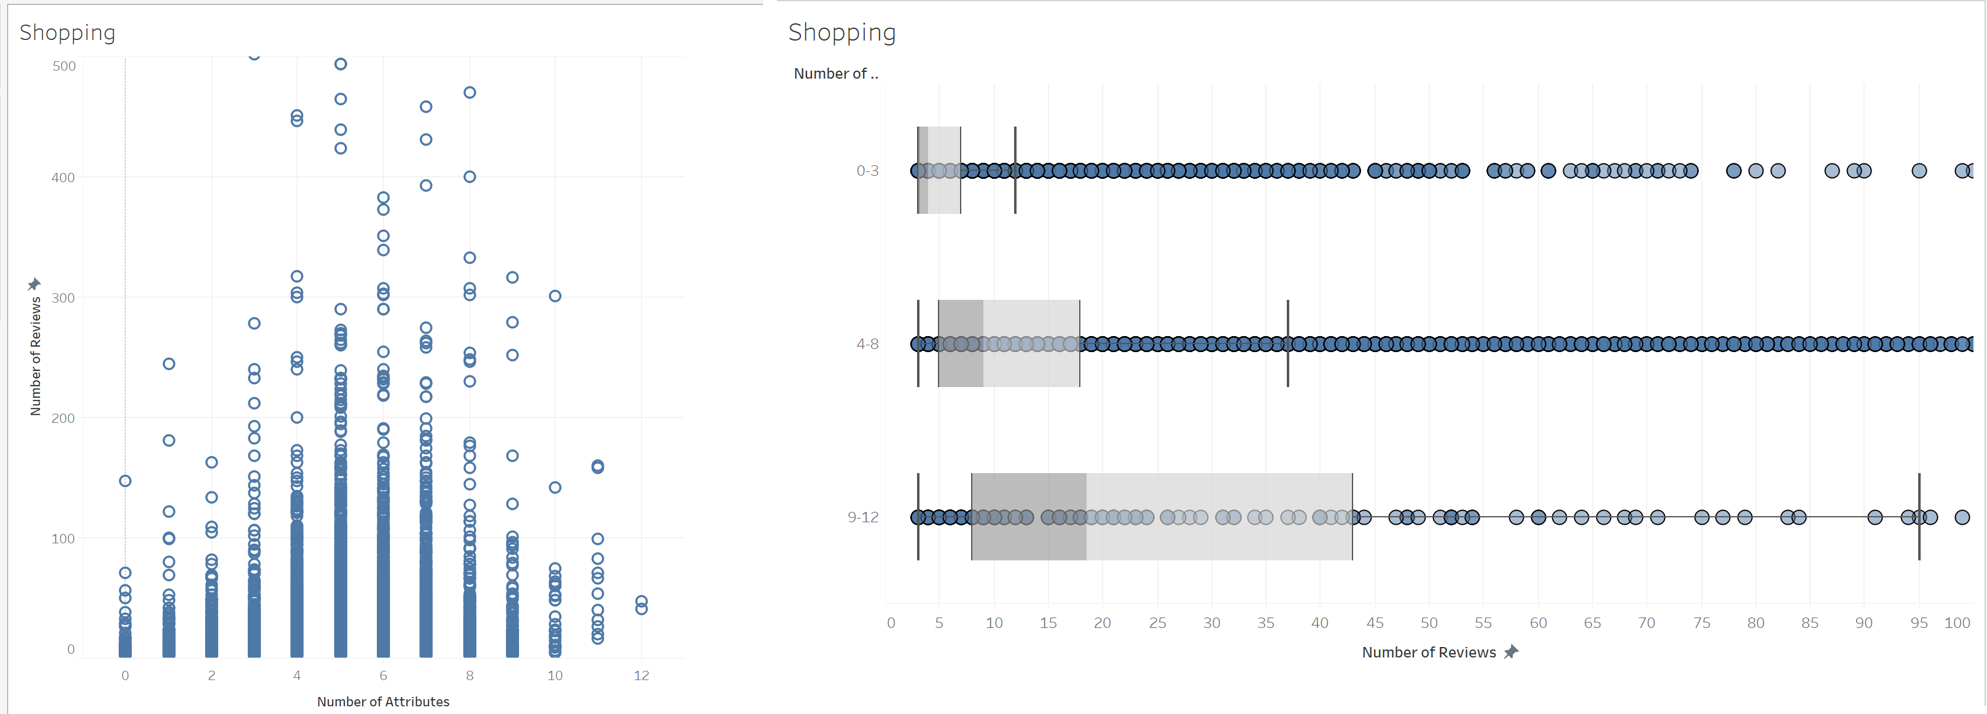

# Arts & Entertainment Category

With the Arts and Enterainment Category, we found 24 attributes that applied. We then converted the attributes into 1's and 0's to count them up later

In [17]:
df_counter_ArtAttr = spark.sql(""" 
SELECT business_id,

CASE WHEN attributes.BusinessAcceptsCreditCards IS NULL THEN 0 ELSE 1 END AS CreditCard,

CASE WHEN attributes.AcceptsInsurance IS NULL THEN 0 ELSE 1 END AS AcceptsInsurance,

CASE WHEN attributes.AgesAllowed IS NULL THEN 0 ELSE 1 END AS AgesAllowed,

CASE WHEN attributes.alcohol IS NULL THEN 0 ELSE 1 END AS Alcohol,

CASE WHEN attributes.Ambience.casual IS NULL AND
          attributes.Ambience.classy IS NULL AND
          attributes.Ambience.divey IS NULL AND
          attributes.Ambience.hipster IS NULL AND
          attributes.Ambience.intimate IS NULL AND
          attributes.Ambience.romantic IS NULL AND
          attributes.Ambience.touristy IS NULL AND
          attributes.Ambience.trendy IS NULL AND
          attributes.Ambience.upscale IS NULL
THEN 0 ELSE 1 END AS Ambience,

CASE WHEN attributes.BYOB IS NULL THEN 0 ELSE 1 END AS BYOB,

CASE WHEN attributes.BYOBCorkage IS NULL THEN 0 ELSE 1 END AS BYOBCorkage,

CASE WHEN attributes.BestNights.friday IS NULL AND
          attributes.BestNights.monday IS NULL AND
          attributes.BestNights.saturday IS NULL AND
          attributes.BestNights.thursday IS NULL AND
          attributes.BestNights.tuesday IS NULL AND
          attributes.BestNights.wednesday IS NULL AND
          attributes.BestNights.sunday IS NULL
THEN 0 ELSE 1 END AS BestNights,

CASE WHEN attributes.BikeParking IS NULL THEN 0 ELSE 1 END AS BikeParking,

CASE WHEN attributes.BusinessAcceptsBitcoin IS NULL THEN 0 ELSE 1 END AS AcceptsBitcoin,

CASE WHEN attributes.ByAppointmentOnly IS NULL THEN 0 ELSE 1 END AS Appointment,

CASE WHEN attributes.GoodForDancing IS NULL THEN 0 ELSE 1 END AS Dancing,

CASE WHEN attributes.GoodForKids IS NULL THEN 0 ELSE 1 END AS Kids,

CASE WHEN attributes.HappyHour IS NULL THEN 0 ELSE 1 END AS HappyHour,

CASE WHEN attributes.HasTV IS NULL THEN 0 ELSE 1 END AS HasTV,

CASE WHEN attributes.Music.background_music IS NULL AND
          attributes.Music.dj IS NULL AND
          attributes.Music.jukebox IS NULL AND
          attributes.Music.karaoke IS NULL AND
          attributes.Music.live IS NULL AND
          attributes.Music.no_music IS NULL AND
          attributes.Music.video IS NULL
THEN 0 ELSE 1 END AS Music,

CASE WHEN attributes.NoiseLevel IS NULL THEN 0 ELSE 1 END AS NoiseLevel,

CASE WHEN attributes.Open24Hours IS NULL THEN 0 ELSE 1 END AS Open24Hours,

CASE WHEN attributes.OutdoorSeating IS NULL THEN 0 ELSE 1 END AS OutdoorSeating,

CASE WHEN hours.monday IS NULL AND
          hours.tuesday IS NULL AND
          hours.wednesday IS NULL AND
          hours.thursday IS NULL AND
          hours.friday IS NULL AND
          hours.saturday IS NULL AND
          hours.sunday IS NULL
THEN 0 ELSE 1 END AS Hours,

CASE WHEN attributes.BusinessParking.garage IS NULL AND
          attributes.BusinessParking.lot IS NULL AND
          attributes.BusinessParking.street IS NULL AND
          attributes.BusinessParking.valet IS NULL AND
          attributes.BusinessParking.validated IS NULL
THEN 0 ELSE 1 END AS Parking,

CASE WHEN attributes.WiFi IS NULL THEN 0 ELSE 1 END AS Wifi,

CASE WHEN attributes.smoking IS NULL THEN 0 ELSE 1 END AS Smoking,

CASE WHEN attributes.WheelchairAccessible IS NULL THEN 0 ELSE 1 END AS WheelchairAccessible, 

review_count



FROM businesses_by_top_4
WHERE is_arts_and_ent = True

""")
df_counter_ArtAttr.show(truncate=False)

df_counter_ArtAttr.createOrReplaceTempView("art")

+----------------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+-------+----+---------+-----+-----+----------+-----------+--------------+-----+-------+----+-------+--------------------+------------+
|business_id           |CreditCard|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|AcceptsBitcoin|Appointment|Dancing|Kids|HappyHour|HasTV|Music|NoiseLevel|Open24Hours|OutdoorSeating|Hours|Parking|Wifi|Smoking|WheelchairAccessible|review_count|
+----------------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+-------+----+---------+-----+-----+----------+-----------+--------------+-----+-------+----+-------+--------------------+------------+
|1_3nOM7s9WqnJWTNu2-i8Q|1         |0               |0          |1      |0       |0   |0          |0         |0          |0             |0          |0  

## Totaling Attributes for Arts and Entertainment Category
We then get a total count for the Arts and Entertainment Category category attributes.

In [18]:
df_ArtAttr_totals = spark.sql("""
SELECT business_id, review_count, CreditCard, AcceptsInsurance, AgesAllowed, Alcohol, Ambience, BYOB, BYOBCorkage, BestNights, BikeParking, AcceptsBitcoin, Appointment, Dancing, Kids, HappyHour, HasTV, Music, NoiseLevel, Open24Hours, OutdoorSeating, Parking, Wifi, Smoking, WheelchairAccessible, Hours,
(CreditCard+AcceptsInsurance+AgesAllowed+Alcohol+Ambience+BYOB+BYOBCorkage+BestNights+BikeParking+AcceptsBitcoin+Appointment+Dancing+Kids+HappyHour+HasTV+Music+NoiseLevel+Open24Hours+OutdoorSeating+Parking+Wifi+Smoking+WheelchairAccessible+Hours) as TOTAL
from art
""")
df_ArtAttr_totals.createOrReplaceTempView("ArtAttr_totals")
df_ArtAttr_totals.show(5)

+--------------------+------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+-------+----+---------+-----+-----+----------+-----------+--------------+-------+----+-------+--------------------+-----+-----+
|         business_id|review_count|CreditCard|AcceptsInsurance|AgesAllowed|Alcohol|Ambience|BYOB|BYOBCorkage|BestNights|BikeParking|AcceptsBitcoin|Appointment|Dancing|Kids|HappyHour|HasTV|Music|NoiseLevel|Open24Hours|OutdoorSeating|Parking|Wifi|Smoking|WheelchairAccessible|Hours|TOTAL|
+--------------------+------------+----------+----------------+-----------+-------+--------+----+-----------+----------+-----------+--------------+-----------+-------+----+---------+-----+-----+----------+-----------+--------------+-------+----+-------+--------------------+-----+-----+
|1_3nOM7s9WqnJWTNu...|           8|         1|               0|          0|      1|       0|   0|          0|         0|          0|       

# Arts & Entertainment Results
The result for this category does not show a strong correlation and is widely dispersed. The attributes filled out for the Arts & Entertainment are heavily filled towards 1-2 and 16-17 attributes The graph shows an increase in reviews when Arts & Entertainment fill out somewhere between 1-2 and 16-17, but does not necessarily show that the more attributes a business fills out, the more reviews they get. Businesses with 2 and 18 attributes filled have the most reviews. 

The second graph shows the box and whiskers plot displaying the number of attributes on the y-axis and review count on the x-axis. We seperated the attributes by three different tiers which are 0-5, 6-14, and 15-20 attributes filled out for each business. Businesses for Arts & Entertainment with 15-20 attributes have the most review count compared to the 6-14 attributes filled. The graph for 0-5 attributes filled also has a high review count but does not have a larger bin compared to 15-20. 

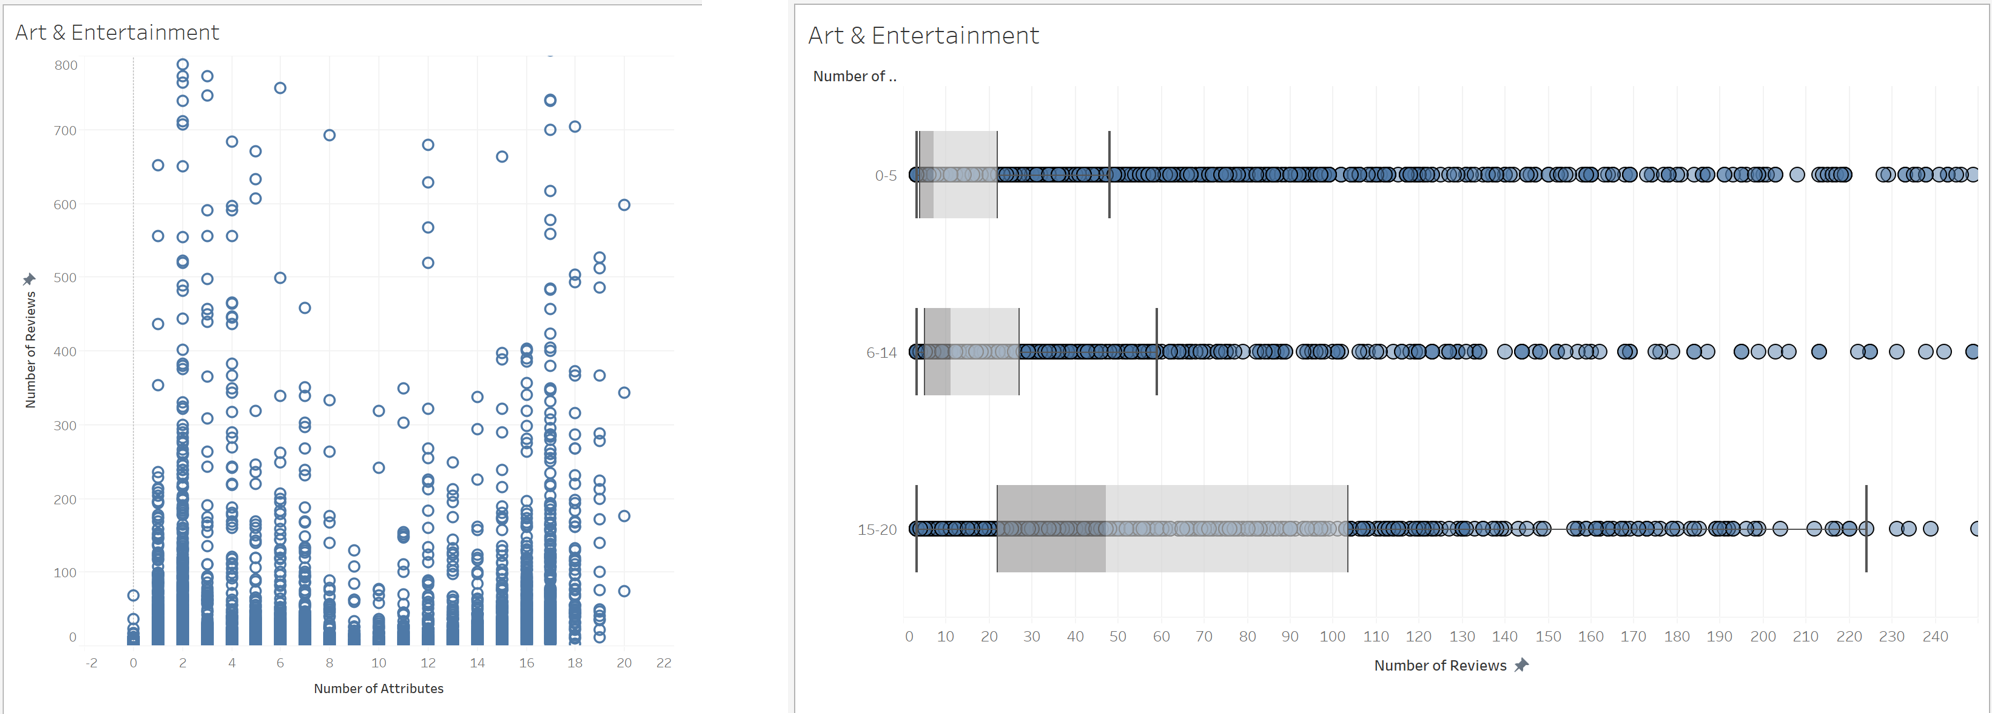

# Home and Local Services Category
We found that there were 17 attributes that applied for the Home and Local Services Category.

In [19]:
df_counter_ServAttr = spark.sql(""" 
SELECT business_id,

CASE WHEN attributes.BusinessAcceptsCreditCards IS NULL THEN 0 ELSE 1 END AS CreditCard,

CASE WHEN attributes.AcceptsInsurance IS NULL THEN 0 ELSE 1 END AS AcceptsInsurance,

CASE WHEN attributes.AgesAllowed IS NULL THEN 0 ELSE 1 END AS AgesAllowed,

CASE WHEN attributes.BestNights.friday IS NULL AND
          attributes.BestNights.monday IS NULL AND
          attributes.BestNights.saturday IS NULL AND
          attributes.BestNights.thursday IS NULL AND
          attributes.BestNights.tuesday IS NULL AND
          attributes.BestNights.wednesday IS NULL AND
          attributes.BestNights.sunday IS NULL
THEN 0 ELSE 1 END AS BestNights,

CASE WHEN attributes.BikeParking IS NULL THEN 0 ELSE 1 END AS BikeParking,

CASE WHEN attributes.BusinessAcceptsBitcoin IS NULL THEN 0 ELSE 1 END AS AcceptsBitcoin,

CASE WHEN attributes.ByAppointmentOnly IS NULL THEN 0 ELSE 1 END AS Appointment,

CASE WHEN attributes.DogsAllowed IS NULL THEN 0 ELSE 1 END AS Dogs,

CASE WHEN attributes.GoodForKids IS NULL THEN 0 ELSE 1 END AS Kids,

CASE WHEN attributes.HappyHour IS NULL THEN 0 ELSE 1 END AS HappyHour,

CASE WHEN attributes.HasTV IS NULL THEN 0 ELSE 1 END AS HasTV,

CASE WHEN attributes.Music.background_music IS NULL AND
          attributes.Music.dj IS NULL AND
          attributes.Music.jukebox IS NULL AND
          attributes.Music.karaoke IS NULL AND
          attributes.Music.live IS NULL AND
          attributes.Music.no_music IS NULL AND
          attributes.Music.video IS NULL
THEN 0 ELSE 1 END AS Music,

CASE WHEN hours.monday IS NULL AND
          hours.tuesday IS NULL AND
          hours.wednesday IS NULL AND
          hours.thursday IS NULL AND
          hours.friday IS NULL AND
          hours.saturday IS NULL AND
          hours.sunday IS NULL
THEN 0 ELSE 1 END AS Hours,

CASE WHEN attributes.BusinessParking.garage IS NULL AND
          attributes.BusinessParking.lot IS NULL AND
          attributes.BusinessParking.street IS NULL AND
          attributes.BusinessParking.valet IS NULL AND
          attributes.BusinessParking.validated IS NULL
THEN 0 ELSE 1 END AS Parking,

CASE WHEN attributes.WiFi IS NULL THEN 0 ELSE 1 END AS Wifi,

CASE WHEN attributes.smoking IS NULL THEN 0 ELSE 1 END AS Smoking,

CASE WHEN attributes.WheelchairAccessible IS NULL THEN 0 ELSE 1 END AS WheelchairAccessible,

review_count



FROM businesses_by_top_4
WHERE is_Home_Service = True

""")
df_counter_ServAttr.show(truncate=False)

df_counter_ServAttr.createOrReplaceTempView("service")

+----------------------+----------+----------------+-----------+----------+-----------+--------------+-----------+----+----+---------+-----+-----+-----+-------+----+-------+--------------------+------------+
|business_id           |CreditCard|AcceptsInsurance|AgesAllowed|BestNights|BikeParking|AcceptsBitcoin|Appointment|Dogs|Kids|HappyHour|HasTV|Music|Hours|Parking|Wifi|Smoking|WheelchairAccessible|review_count|
+----------------------+----------+----------------+-----------+----------+-----------+--------------+-----------+----+----+---------+-----+-----+-----+-------+----+-------+--------------------+------------+
|kCoE3jvEtg6UVz5SOD3GVw|1         |0               |0          |0         |0          |0             |1          |0   |0   |0        |0    |0    |1    |0      |0   |0      |0                   |5           |
|Y0eMNa5C-YU1RQOZf9XvVA|1         |0               |0          |0         |0          |0             |0          |0   |0   |0        |0    |0    |1    |0      |0   |0  

## Totaling Attributes for Home and Services Category
We then get a total count for the Home and Services category attributes.

In [20]:
df_ServAttr_totals = spark.sql("""
SELECT business_id, review_count, CreditCard, AcceptsInsurance, AgesAllowed, BestNights, BikeParking, AcceptsBitcoin, Dogs, Parking, Kids, HappyHour, HasTV, Music, Appointment, WheelchairAccessible, Wifi, Smoking,
(CreditCard+AcceptsInsurance+AgesAllowed+BestNights+BikeParking+AcceptsBitcoin+Dogs+Parking+Kids+HappyHour+HasTV+Music+Appointment+WheelchairAccessible+Wifi+Smoking) as TOTAL
from service
""")
df_ServAttr_totals.createOrReplaceTempView("ServAttr_totals")
df_ServAttr_totals.show()

+--------------------+------------+----------+----------------+-----------+----------+-----------+--------------+----+-------+----+---------+-----+-----+-----------+--------------------+----+-------+-----+
|         business_id|review_count|CreditCard|AcceptsInsurance|AgesAllowed|BestNights|BikeParking|AcceptsBitcoin|Dogs|Parking|Kids|HappyHour|HasTV|Music|Appointment|WheelchairAccessible|Wifi|Smoking|TOTAL|
+--------------------+------------+----------+----------------+-----------+----------+-----------+--------------+----+-------+----+---------+-----+-----+-----------+--------------------+----+-------+-----+
|kCoE3jvEtg6UVz5SO...|           5|         1|               0|          0|         0|          0|             0|   0|      0|   0|        0|    0|    0|          1|                   0|   0|      0|    2|
|Y0eMNa5C-YU1RQOZf...|          23|         1|               0|          0|         0|          0|             0|   0|      0|   0|        0|    0|    0|          0|           

# Home & Local Services Results
The graph shows that there is a correlation between the number of attributes filled out and the number of reviews. It shows that a majority of Home & Local Services fill out between 1-4 attributes on average. Businesses that filled out 2-3 attributes have the most review count compared to others. The graph shows an increase in reviews when restaurants fill out more than 1 attribute but starts to decline after 4. This graph does not necessarily show that the more attributes a business fills out, the more reviews they get.

The second graph shows the box and whiskers plot showing the number of attributes on the y-axis and review count on the x-axis. We seperated the attributes by three different tiers which are 0-3, 4-8, and 9-3 attributes filled out for each business. Businesses for Home & Local Services with 0-3 attributes have the most review count compared to the other tiers. Businesses with 9-13 attributes does have that much reviews compared to others.



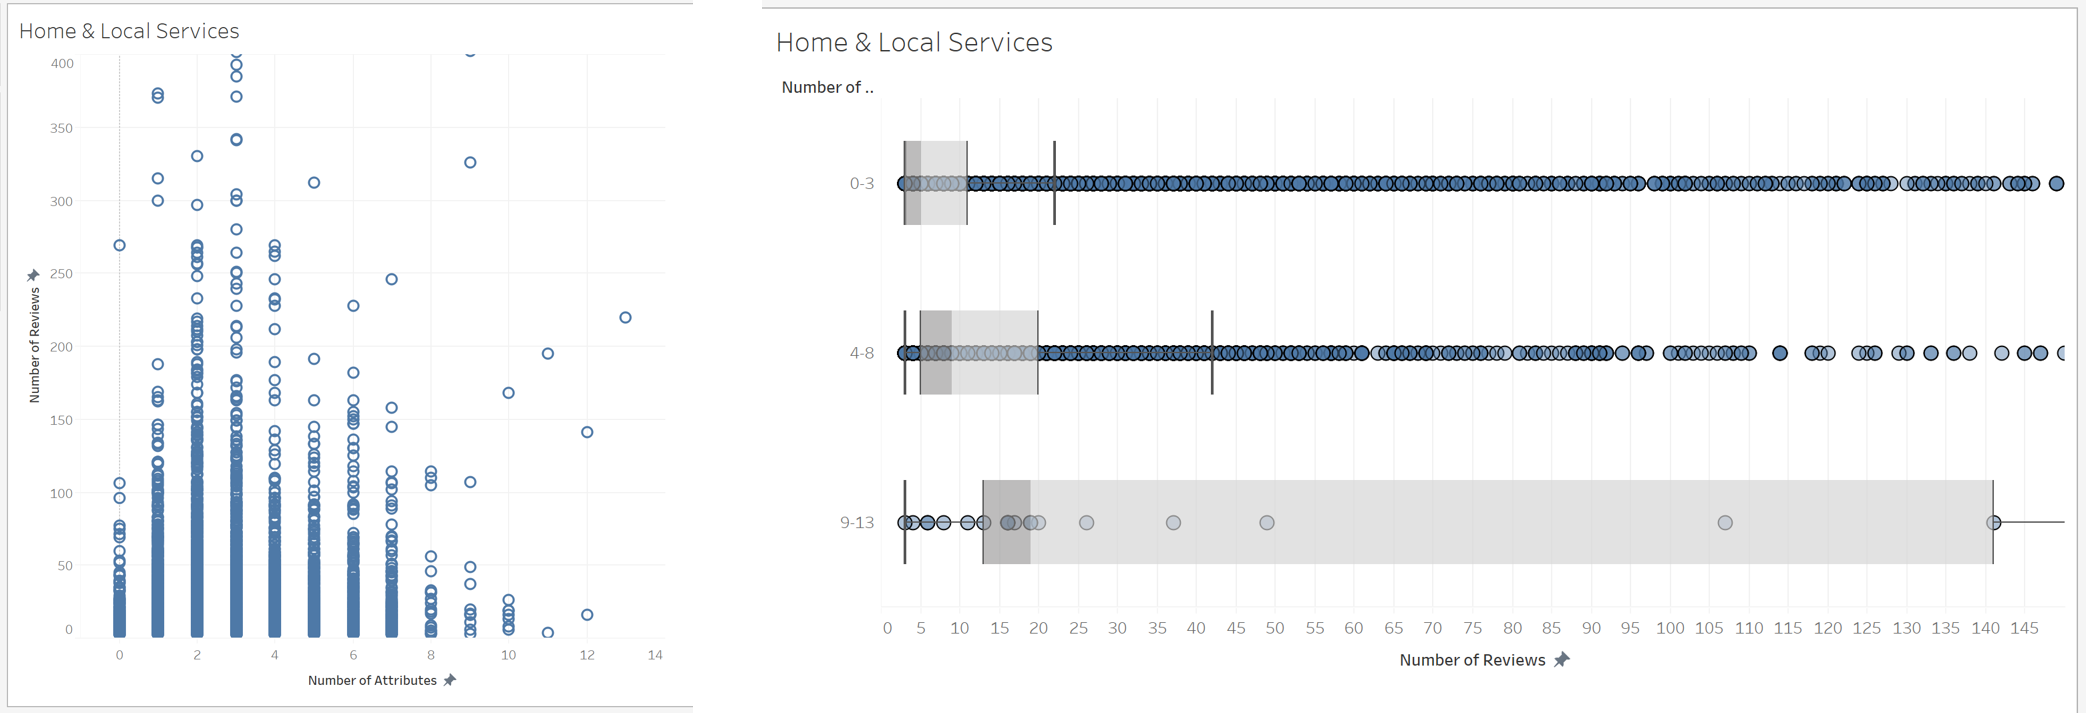

# Question 2 

## Does the amount of additional data filled in for a business(attributes, hours) increase more with the length of time since their first review?

## First Review

To determine whether the time of the first review affects the number of attributes filled out, we need to pull the date of the first written review per business.

Yelp businesses do not provide the year when they joined. Therefore, we will be using the year of the first review to categorize the businsses by year.


In [21]:
df_first_review = spark.sql("""
SELECT review.business_id, business.name, review.review_id, date, review_count
FROM (

SELECT *, ROW_NUMBER() OVER (PARTITION BY review.business_id ORDER by review.business_id, date) rn
FROM review
INNER JOIN business ON review.business_id = business.business_id
) 
WHERE rn = 1


""")

df_first_review.createOrReplaceTempView("first_review")

df_first_review.show(5)


+--------------------+--------------------+--------------------+----------+------------+
|         business_id|                name|           review_id|      date|review_count|
+--------------------+--------------------+--------------------+----------+------------+
|--9e1ONYQuAa-CB_R...|Delmonico Steakhouse|lgpSS6UsKYIvnQaw8...|2005-04-27|        1451|
|-6c_bJblLXUwoWfmY...|Neo-Paws Internat...|JAppdmGfv9BiQvzX7...|2017-03-02|          17|
|-DgHX-Kzq8UX8yf6o...|            Bellevue|2h9FZeWhMmMXzYGCb...|2013-04-15|           4|
|-ElDqujEn1u64ynQr...| McFarling Law Group|xww2O_9dS6DakArc4...|2014-05-05|          12|
|-I06hkMFrX0KBqu61...|Andre Agassi Coll...|H2Rkqy3538ImP6izG...|2010-01-20|           4|
+--------------------+--------------------+--------------------+----------+------------+
only showing top 5 rows



In [22]:
df_AllBusAttr_totals_year = spark.sql("""
SELECT AllBusAttr_totals.business_id, AllBusAttr_totals.review_count, YEAR(date) as year, total
FROM first_review
INNER JOIN AllBusAttr_totals ON first_review.business_id = AllBusAttr_totals.business_id
""")
df_AllBusAttr_totals_year.createOrReplaceTempView("AllBusAttr_totals_year")
df_AllBusAttr_totals_year.show()


+--------------------+------------+----+-----+
|         business_id|review_count|year|total|
+--------------------+------------+----+-----+
|--9e1ONYQuAa-CB_R...|        1451|2005|   24|
|-6c_bJblLXUwoWfmY...|          17|2017|    1|
|-DgHX-Kzq8UX8yf6o...|           4|2013|   14|
|-ElDqujEn1u64ynQr...|          12|2014|    1|
|-I06hkMFrX0KBqu61...|           4|2010|    0|
|-RRnldwSqCZT6OpuW...|           3|2009|    2|
|-TGwtTiieh_JLml5_...|           6|2009|    8|
|-VAsjhmAbKF3Pb_-8...|           9|2014|   16|
|-X3Cti2B7VnZAileP...|           6|2009|   18|
|-cxD1NimFldATDUsN...|          23|2011|   19|
|-lWPadzpW-DFB0C6U...|           6|2007|    9|
|-m8v19CXrGEYr3PAL...|           3|2009|    3|
|-qL-wX-UuMaHDBA2X...|          59|2012|    2|
|-wby-wyqaq1ZDTFDT...|          18|2013|    4|
|069TWjwxctY-3X_Ti...|         101|2014|   21|
|0859wfd1BQHG46Zpw...|         224|2014|   25|
|09OYbFNrS1n8u5gE6...|          21|2011|    8|
|09p3b5BCSz2FPvgR-...|          11|2010|    0|
|0DwMrcy7_X_C

## Visualizing the Data
To better visualize the information above, we split the business by the year of the first review. This is because we do not know when the business joined. So by gathering their first review, we can use this as a proxy. 

We can see in the data that a majority of the businesses joined in 2013 (11.74%).
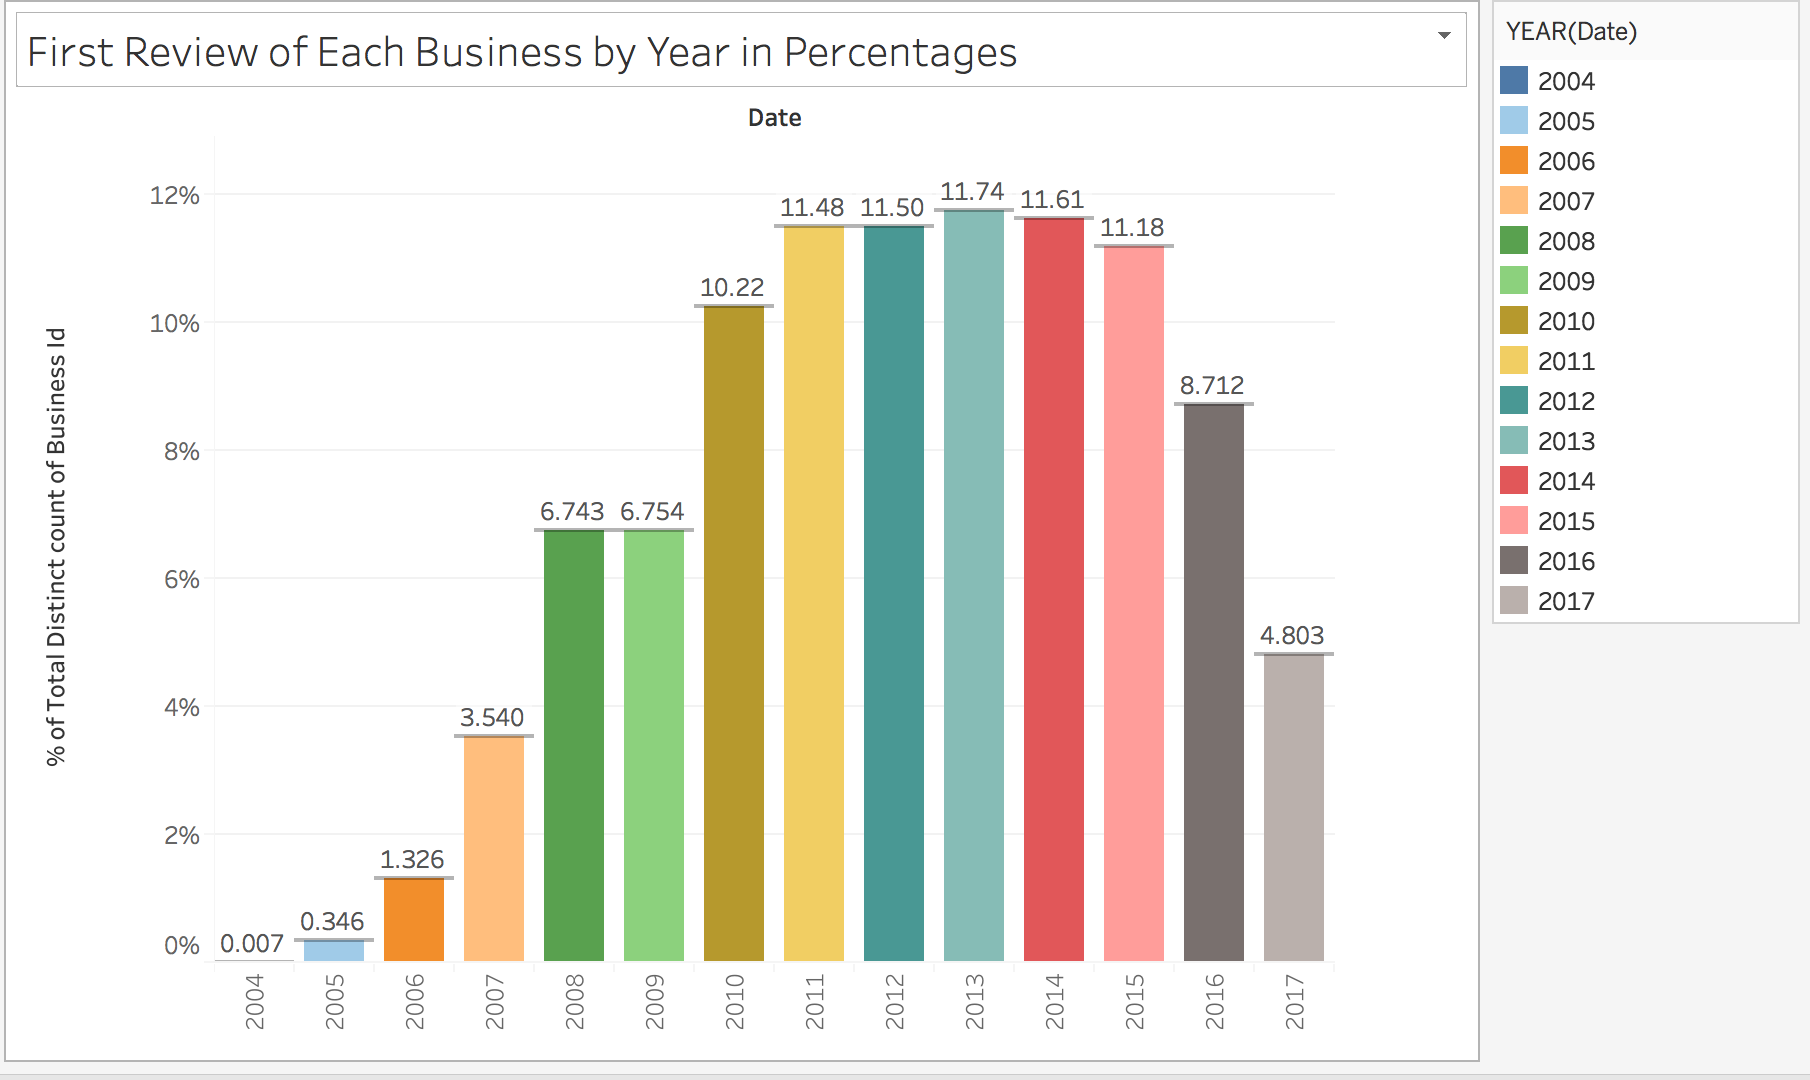

## Splitting the date of first review by top 4 categories

In order to dive deeper into exploring the top 4 categories, we need to seperate the businsses in the top 4 categories. We will not need the other categories because they only make up a small percent of yelp's businesses

In [23]:
df_first_review_by_categories = spark.sql("""
SELECT first_review.business_id, name, review_id, Year(date) AS Year, 
is_shopping, is_restaurants, is_Home_service, is_arts_and_ent, hours,
attributes
FROM first_review
INNER JOIN businesses_by_top_4 on first_review.business_id = businesses_by_top_4.business_id
""")
df_first_review_by_categories.createOrReplaceTempView("first_review_by_categories")
df_first_review_by_categories.show()

+--------------------+--------------------+--------------------+----+-----------+--------------+---------------+---------------+--------------------+--------------------+
|         business_id|                name|           review_id|Year|is_shopping|is_restaurants|is_Home_service|is_arts_and_ent|               hours|          attributes|
+--------------------+--------------------+--------------------+----+-----------+--------------+---------------+---------------+--------------------+--------------------+
|--9e1ONYQuAa-CB_R...|Delmonico Steakhouse|lgpSS6UsKYIvnQaw8...|2005|      false|          true|          false|          false|[11:30-14:00,11:3...|[null,null,full_b...|
|-6c_bJblLXUwoWfmY...|Neo-Paws Internat...|JAppdmGfv9BiQvzX7...|2017|      false|         false|          false|          false|[0:00-0:00,0:00-0...|[null,null,null,n...|
|-DgHX-Kzq8UX8yf6o...|            Bellevue|2h9FZeWhMmMXzYGCb...|2013|      false|         false|          false|          false|[12:00-1:00,null,

## Year of First Review and Total Attributes - Restaurants Category

We then get the total attributes per restaurant and the year of the first review written. This will allow us to then import our results in tableau and visualize whether time plays an important role for a business to fill out their attributes.


In [24]:
df_first_review_restaurants = spark.sql("""
SELECT restAttr_totals.business_id, name, review_count, year, total AS total_attributes
FROM first_review_by_categories
INNER JOIN restAttr_totals on first_review_by_categories.business_id = restAttr_totals.business_id
""")
df_first_review_restaurants.createOrReplaceTempView("first_review_restaurants")
df_first_review_restaurants.show(5)

+--------------------+--------------------+------------+----+----------------+
|         business_id|                name|review_count|year|total_attributes|
+--------------------+--------------------+------------+----+----------------+
|--9e1ONYQuAa-CB_R...|Delmonico Steakhouse|        1451|2005|              24|
|-VAsjhmAbKF3Pb_-8...|          McDonald's|           9|2014|              16|
|-X3Cti2B7VnZAileP...|Xanadu Chinese Re...|           6|2009|              18|
|-cxD1NimFldATDUsN...|      Coasta Cantina|          23|2011|              19|
|-lWPadzpW-DFB0C6U...|         Oettinger's|           6|2007|               9|
+--------------------+--------------------+------------+----+----------------+
only showing top 5 rows



## Year of First Review and Total Attributes - Shopping Category

The first review written and total attributes of all shopping businsses are needed to visualize the shopping category.

In [25]:
df_first_review_shopping = spark.sql("""
SELECT ShoppingAttr_totals.business_id, name, review_count, year, total AS total_attributes
FROM first_review_by_categories
INNER JOIN ShoppingAttr_totals on first_review_by_categories.business_id = ShoppingAttr_totals.business_id
""")
df_first_review_shopping.createOrReplaceTempView("first_review_shopping")
df_first_review_shopping.show(5)

+--------------------+-------------------+------------+----+----------------+
|         business_id|               name|review_count|year|total_attributes|
+--------------------+-------------------+------------+----+----------------+
|-RRnldwSqCZT6OpuW...|          Grandiose|           3|2009|               1|
|-m8v19CXrGEYr3PAL...|   Daystar Boutique|           3|2009|               2|
|-wby-wyqaq1ZDTFDT...|trendy wall designs|          18|2013|               3|
|10dD5L3JI17V2shf-...|       DeBerardinis|          27|2010|               6|
|12ZCvo5eJShrpxwzv...|      Anna's Linens|           8|2011|               4|
+--------------------+-------------------+------------+----+----------------+
only showing top 5 rows



## Year of First Review and Total Attributes - Arts and Entertainment Category
The first review written and total attributes of all shopping businsses are needed to visualize the Arts and Entertainment Category.

In [26]:
df_first_review_Art = spark.sql("""
SELECT ArtAttr_totals.business_id, name, review_count, year, total AS total_attributes
FROM first_review_by_categories
INNER JOIN ArtAttr_totals on first_review_by_categories.business_id = ArtAttr_totals.business_id
""")
df_first_review_Art.createOrReplaceTempView("first_review_Arts")
df_first_review_Art.show(5)

+--------------------+--------------------+------------+----+----------------+
|         business_id|                name|review_count|year|total_attributes|
+--------------------+--------------------+------------+----+----------------+
|-wby-wyqaq1ZDTFDT...| trendy wall designs|          18|2013|               3|
|4WVNsBfTtCzfQhCOD...|PartyZams Singing...|           3|2017|               2|
|4i9oHhKotVFRzSSuw...|          Bingo Room|           8|2010|               1|
|5GtfNFhdP-ws1BEDW...|SocietyJazz: Grap...|           4|2013|               1|
|5LZhDRyz3q_UNZ29c...|              Mo5aic|          48|2013|               1|
+--------------------+--------------------+------------+----+----------------+
only showing top 5 rows



## Year of First Review and Total Attributes - Home and Local Services Category
The first review written and total attributes of all shopping businsses are needed to visualize the Home and Local Services Category.

In [27]:
df_first_review_Service = spark.sql("""
SELECT ServAttr_totals.business_id, name, review_count, year, total AS total_attributes
FROM first_review_by_categories
INNER JOIN ServAttr_totals on first_review_by_categories.business_id = ServAttr_totals.business_id
""")
df_first_review_Service.createOrReplaceTempView("first_review_Service")
df_first_review_Service.show(5)

+--------------------+--------------------+------------+----+----------------+
|         business_id|                name|review_count|year|total_attributes|
+--------------------+--------------------+------------+----+----------------+
|0XF5tnQeSZO8BG6OE...|Zazu Pannee Park ...|          25|2009|               3|
|1L594U2YRyLHhlrNg...|Rite-Way Carpet D...|           8|2011|               1|
|1LoUdXkiRjio2LnVI...|El Pueblo Dry Cle...|           3|2015|               1|
|1LtmnNKb63XUwq9_N...|Guardian Self Sto...|           3|2013|               1|
|29U5LuZgN-u-kxfgd...|Buzz Tech Pest Co...|           4|2017|               1|
+--------------------+--------------------+------------+----+----------------+
only showing top 5 rows



# # Results by Category

Based on the results below, we can conclude that the length of time mostly affects the attributes for restaurants.  We divded the year by the average attributes filled out per category. Starting from 2006 to 2010, the average number of attributes is much higher compared to the more recent years such as 2015. We did not choose 2004 and 2005 because of the small number of restaurants which can significantly skew our results. 

There is not much of a correlation for the other three categories. The average stays fairly close as the years increase. Our hypothesis was slightly correct because the restaurants category was true. 
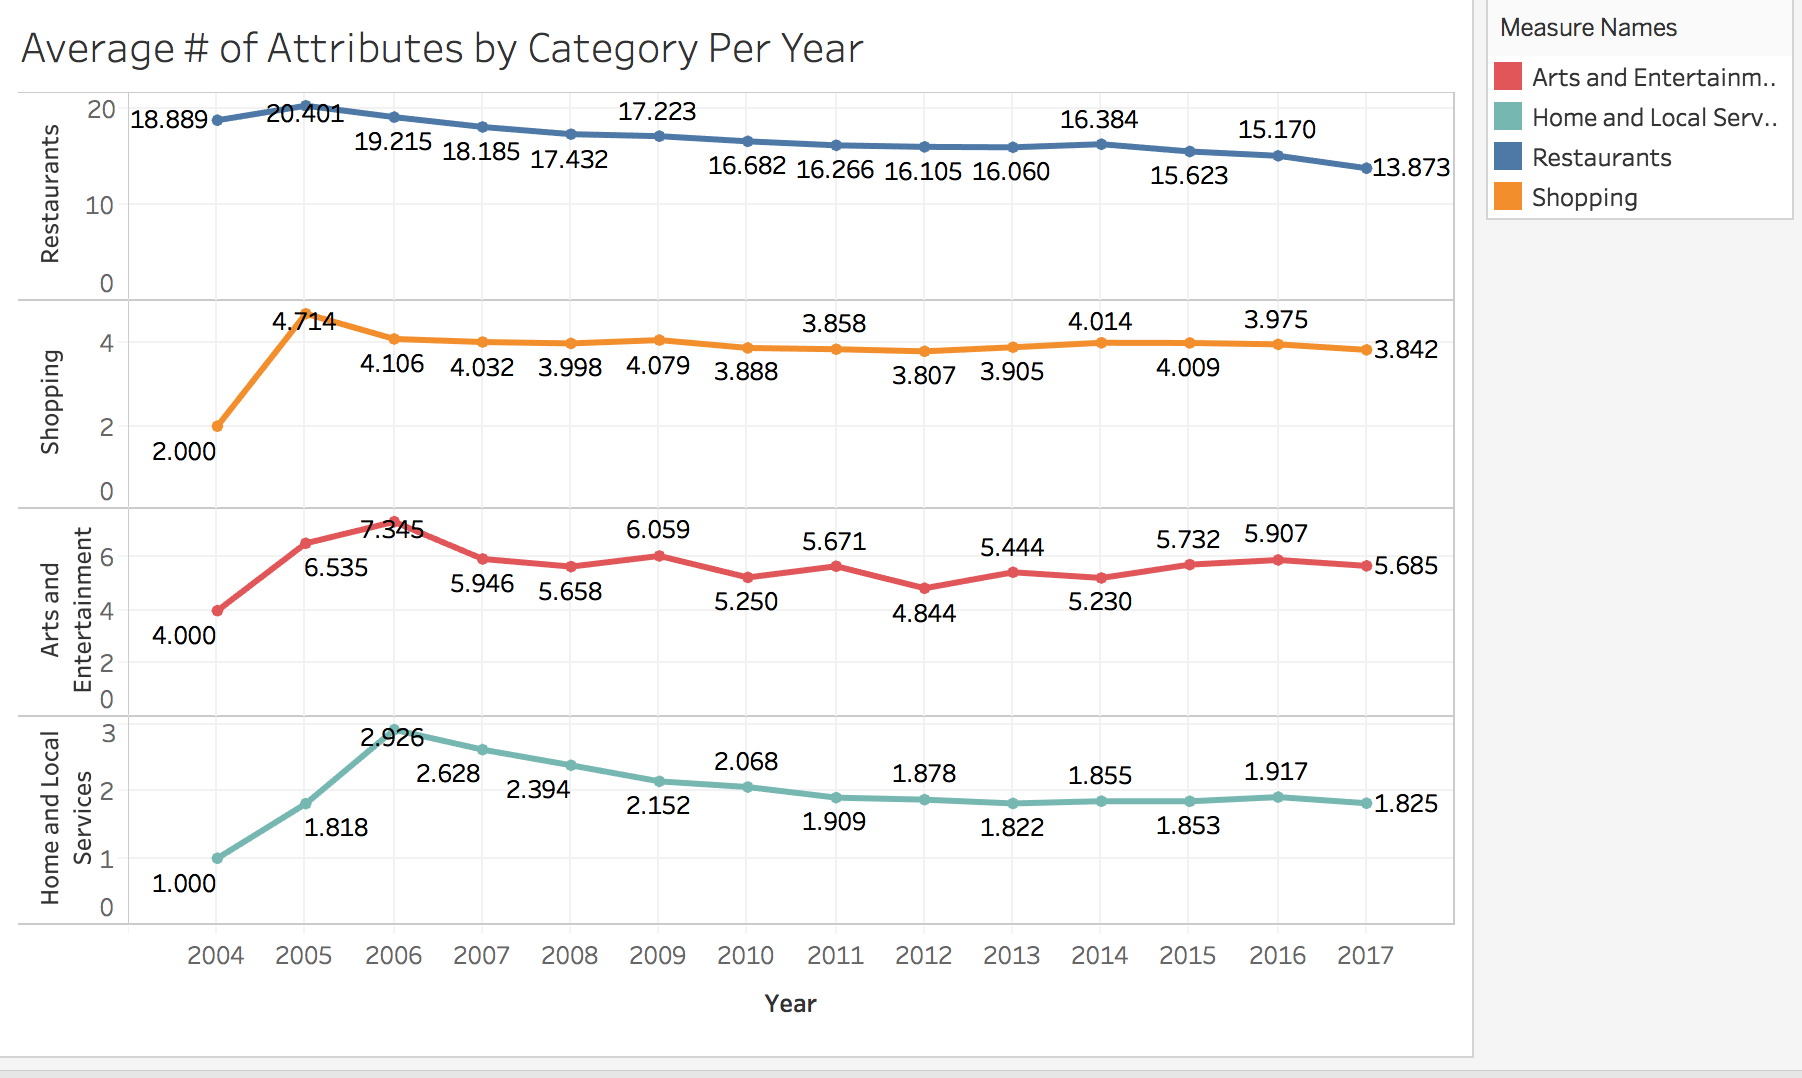

# Question 3:

## Do businesses that closed have less data filled in?



### Results for closed businesses
To get a better understanding of the question in regards to restaurant category, our group selected the business_id and is_open attribute from the business table where is_open !=1. This will allow us to see every single business that is opened or closed


In [28]:
df_bus_closed = spark.sql("""
SELECT business_id, is_open 
FROM business
WHERE is_open != 1
""")
df_bus_closed.show(10)

+--------------------+-------+
|         business_id|is_open|
+--------------------+-------+
|8DShNS-LuFqpEWIp0...|      0|
|XOSRcvtaKc_Q5H1SA...|      0|
|l09JfMeQ6ynYs5MCJ...|      0|
|94KziT6DQ9XlBET3W...|      0|
|gAy4LYpsScrj8POnC...|      0|
|1_3nOM7s9WqnJWTNu...|      0|
|S4a42azhoOmr0fpeN...|      0|
|A_Ij4SwFmlRbVtRns...|      0|
|BnuzcebyB1AfxH0kj...|      0|
|r6Jw8oRCeumxu7Y1W...|      0|
+--------------------+-------+
only showing top 10 rows



### Results for open and closed restaurants with total attributes filled

We then applied the same technique above and retrieve the total attributes per business in the restaurants category. 


In [29]:
df_rest_closed_bus = spark.sql("""
SELECT RestAttr_totals.business_id, is_open, total AS total_attributes
FROM business
INNER JOIN RestAttr_totals on business.business_id = RestAttr_totals.business_id
""")
df_rest_closed_bus.createOrReplaceTempView("rest_closed_bus")
df_rest_closed_bus.show(10)

+--------------------+-------+----------------+
|         business_id|is_open|total_attributes|
+--------------------+-------+----------------+
|PfOCPjBrlQAnz__NX...|      1|              26|
|o9eMRCWt5PkpLDE0g...|      1|              15|
|XOSRcvtaKc_Q5H1SA...|      0|              18|
|fNMVV_ZX7CJSDWQGd...|      1|              15|
|l09JfMeQ6ynYs5MCJ...|      0|              19|
|Gu-xs3NIQTj3Mj2xY...|      1|              20|
|1K4qrnfyzKzGgJPBE...|      1|              23|
|Dj0S-Oe4ytRJzMGUP...|      1|               6|
|gAy4LYpsScrj8POnC...|      0|               7|
|nbhBRhZtdaZmMMeb2...|      1|              15|
+--------------------+-------+----------------+
only showing top 10 rows



# Restaurants Result
The x-axis is the total number of attributes a business has filled from 1-27 and the y-axis is the total number count of businesses that are either open or close. The graph shows a correlation between total number of restaurants open or closed and the number of attributes filled out. Businesses with 18-21 attributes filled are more likely to stay open. The graph shows that majority of the businesses for the restaurant category fill out between 18-21 attributes.



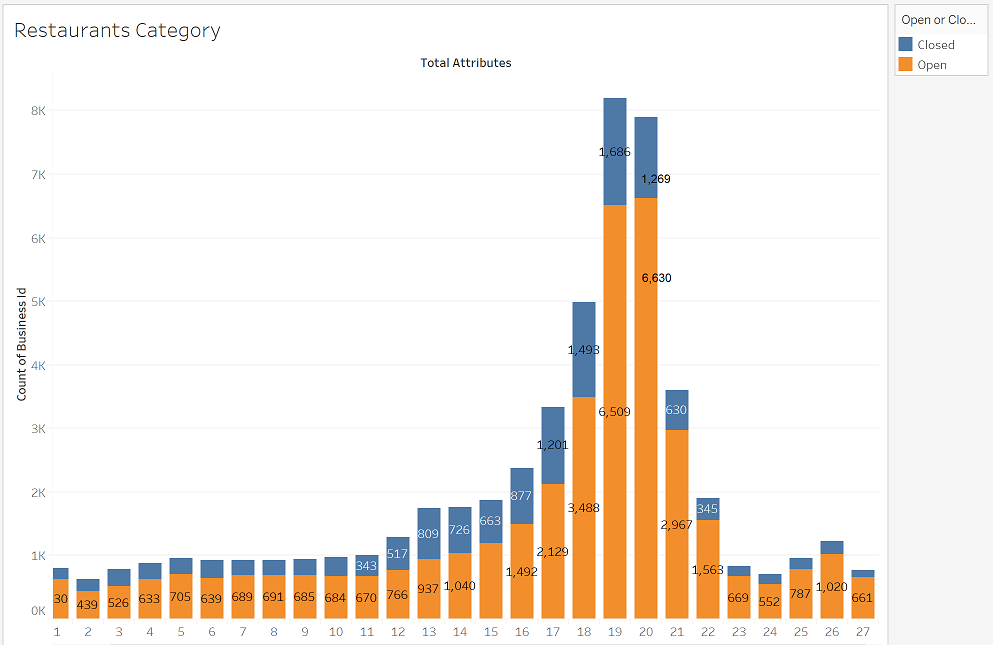

### Results for open and closed shopping with total attributes filled

For the shopping category, finding out each businesses that are closed and are still open plus  the total attributes filled for each businesses was needed to better visualize our results. 


In [30]:
df_shopping_closed_bus = spark.sql("""
SELECT ShoppingAttr_totals.business_id, is_open, total AS total_attributes
FROM business
INNER JOIN ShoppingAttr_totals on business.business_id = ShoppingAttr_totals.business_id
""")
df_shopping_closed_bus.createOrReplaceTempView("shopping_closed_bus")
df_shopping_closed_bus.show(10)

+--------------------+-------+----------------+
|         business_id|is_open|total_attributes|
+--------------------+-------+----------------+
|8DShNS-LuFqpEWIp0...|      0|               4|
|OD2hnuuTJI9uotcKy...|      1|               5|
|94KziT6DQ9XlBET3W...|      0|               3|
|VBHEsoXQb2AQ76J9l...|      1|               7|
|S4a42azhoOmr0fpeN...|      0|               0|
|5qpi5VQ_S2Itm8xvR...|      1|               5|
|DPQnTnNw2PJj7DdEN...|      1|               4|
|XPZT3zLrkLkFSkBVx...|      0|               5|
|zWb-kwaANIPMS_AFB...|      1|               4|
|EfYExaDrwhj0k611u...|      1|               0|
+--------------------+-------+----------------+
only showing top 10 rows



# Shopping Result
For the shopping results, the x-axis is the total number of attributes a business has filled from 1-10. The y-axis is the total number count of businesses that are either open or close. The graph shows that majority of the businesses for the shopping category fill out between 3-5 attributes.


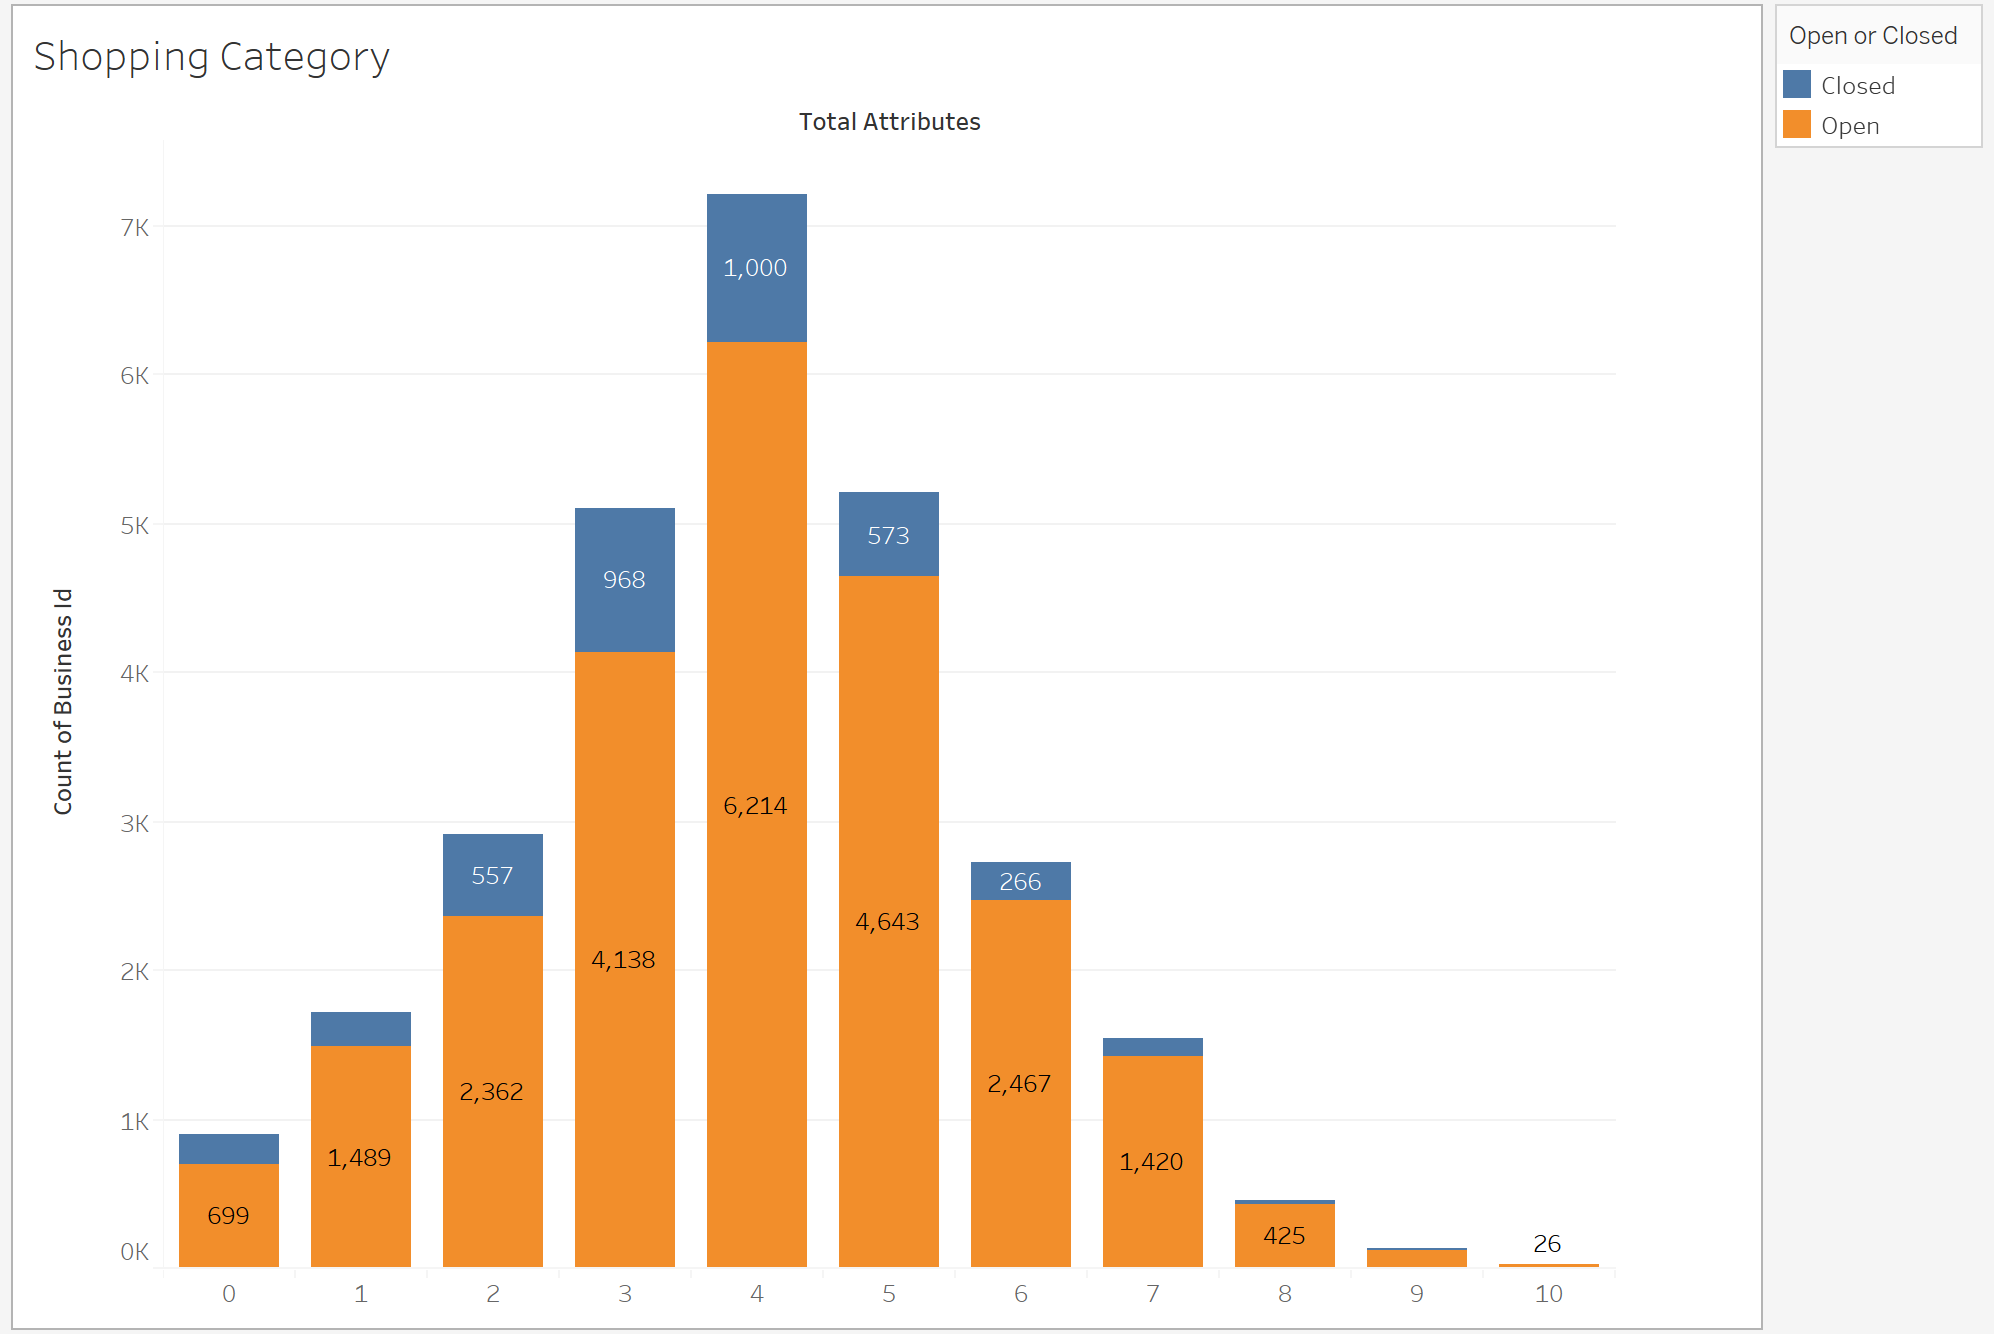

### Results for open and closed arts & entertainment with total attributes filled

For the arts & entertainment category, finding out each businesses that are closed and are still open plus  the total attributes filled for each businesses was needed to better visualize our results. 


In [31]:
df_art_closed_bus = spark.sql("""
SELECT ArtAttr_totals.business_id, is_open, total AS total_attributes
FROM business
INNER JOIN ArtAttr_totals on business.business_id = ArtAttr_totals.business_id
""")
df_shopping_closed_bus.createOrReplaceTempView("art_closed_bus")
df_shopping_closed_bus.show(10)

+--------------------+-------+----------------+
|         business_id|is_open|total_attributes|
+--------------------+-------+----------------+
|8DShNS-LuFqpEWIp0...|      0|               4|
|OD2hnuuTJI9uotcKy...|      1|               5|
|94KziT6DQ9XlBET3W...|      0|               3|
|VBHEsoXQb2AQ76J9l...|      1|               7|
|S4a42azhoOmr0fpeN...|      0|               0|
|5qpi5VQ_S2Itm8xvR...|      1|               5|
|DPQnTnNw2PJj7DdEN...|      1|               4|
|XPZT3zLrkLkFSkBVx...|      0|               5|
|zWb-kwaANIPMS_AFB...|      1|               4|
|EfYExaDrwhj0k611u...|      1|               0|
+--------------------+-------+----------------+
only showing top 10 rows



# Arts & Entertainment Result
For this graph, It shows that majority of the business in that category has only filled 1-2 attributes but are more likely to stay open. You can see a great spike compared to the businesses that has 3 or more attributes filled.  The x-axis is the total number of attributes a business has filled from 1-20and the y-axis is the total number count of businesses that are either open or close and the 


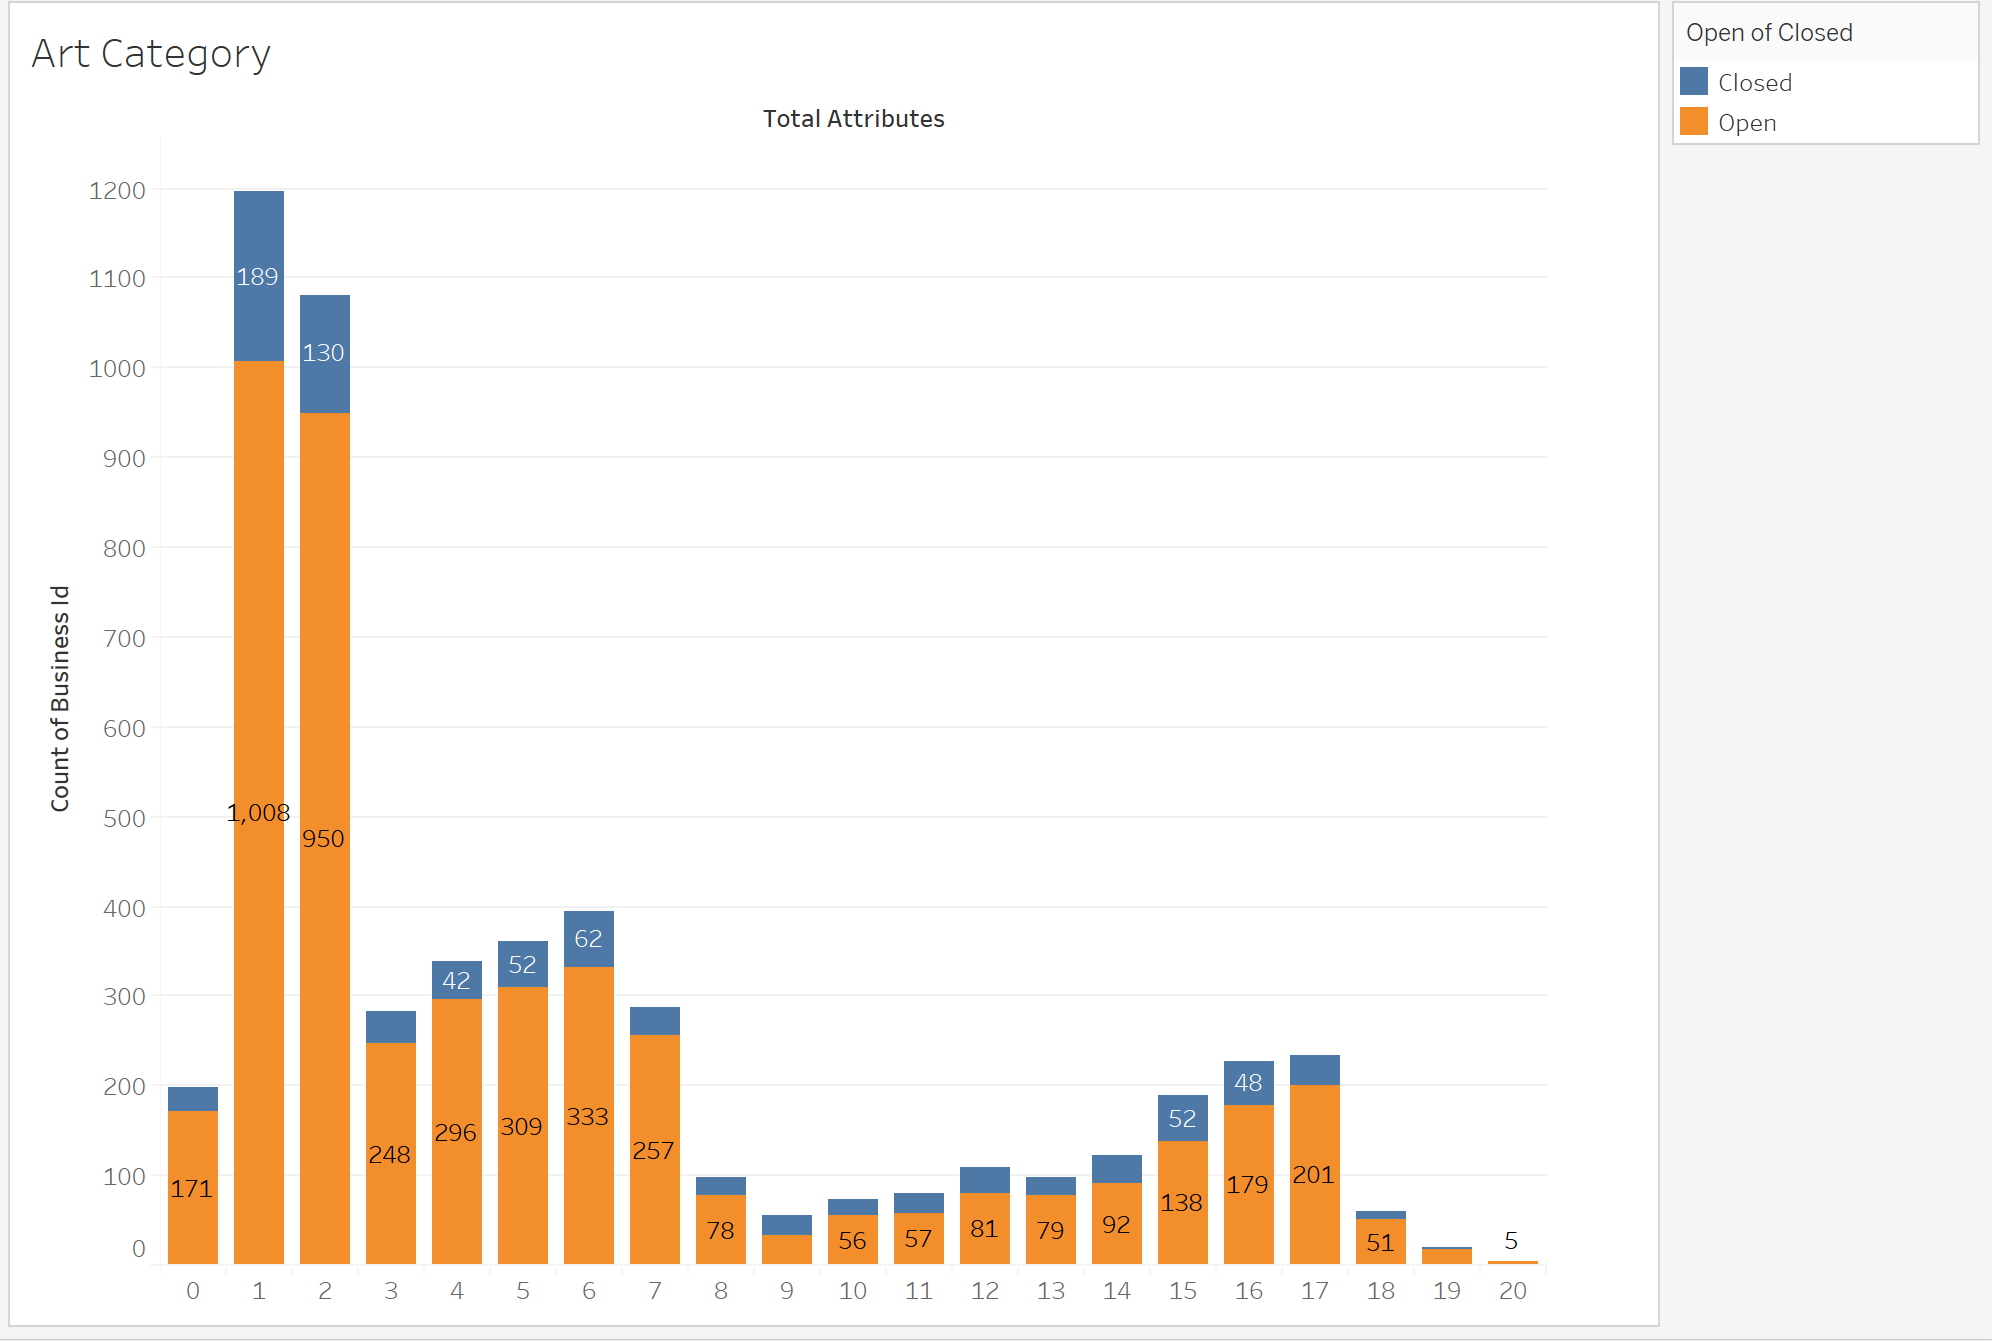


### Results for open and closed home & local services with total attributes filled

For the home & local services category, finding out each businesses that are closed and are still open plus  the total attributes filled for each businesses was needed to better visualize our results. 


In [32]:
df_serv_closed_bus = spark.sql("""
SELECT ServAttr_totals.business_id, is_open, total AS total_attributes
FROM business
INNER JOIN ServAttr_totals on business.business_id = ServAttr_totals.business_id
""")
df_shopping_closed_bus.createOrReplaceTempView("serv_closed_bus")
df_shopping_closed_bus.show(10)

+--------------------+-------+----------------+
|         business_id|is_open|total_attributes|
+--------------------+-------+----------------+
|8DShNS-LuFqpEWIp0...|      0|               4|
|OD2hnuuTJI9uotcKy...|      1|               5|
|94KziT6DQ9XlBET3W...|      0|               3|
|VBHEsoXQb2AQ76J9l...|      1|               7|
|S4a42azhoOmr0fpeN...|      0|               0|
|5qpi5VQ_S2Itm8xvR...|      1|               5|
|DPQnTnNw2PJj7DdEN...|      1|               4|
|XPZT3zLrkLkFSkBVx...|      0|               5|
|zWb-kwaANIPMS_AFB...|      1|               4|
|EfYExaDrwhj0k611u...|      1|               0|
+--------------------+-------+----------------+
only showing top 10 rows



# Home & Local Services Result
For Home and local services, the graph shows that many businesses in this industry filled out 1-2 attributes. The total number of businesses starts to decline when more than 3 attributes are filled. The x-axis is the total number of attributes a business has filled from 1-7 and the y-axis is the total number count of businesses that are either open or close. Businesses with 2 or more attributes filled are less likely to close when looking at the data. 

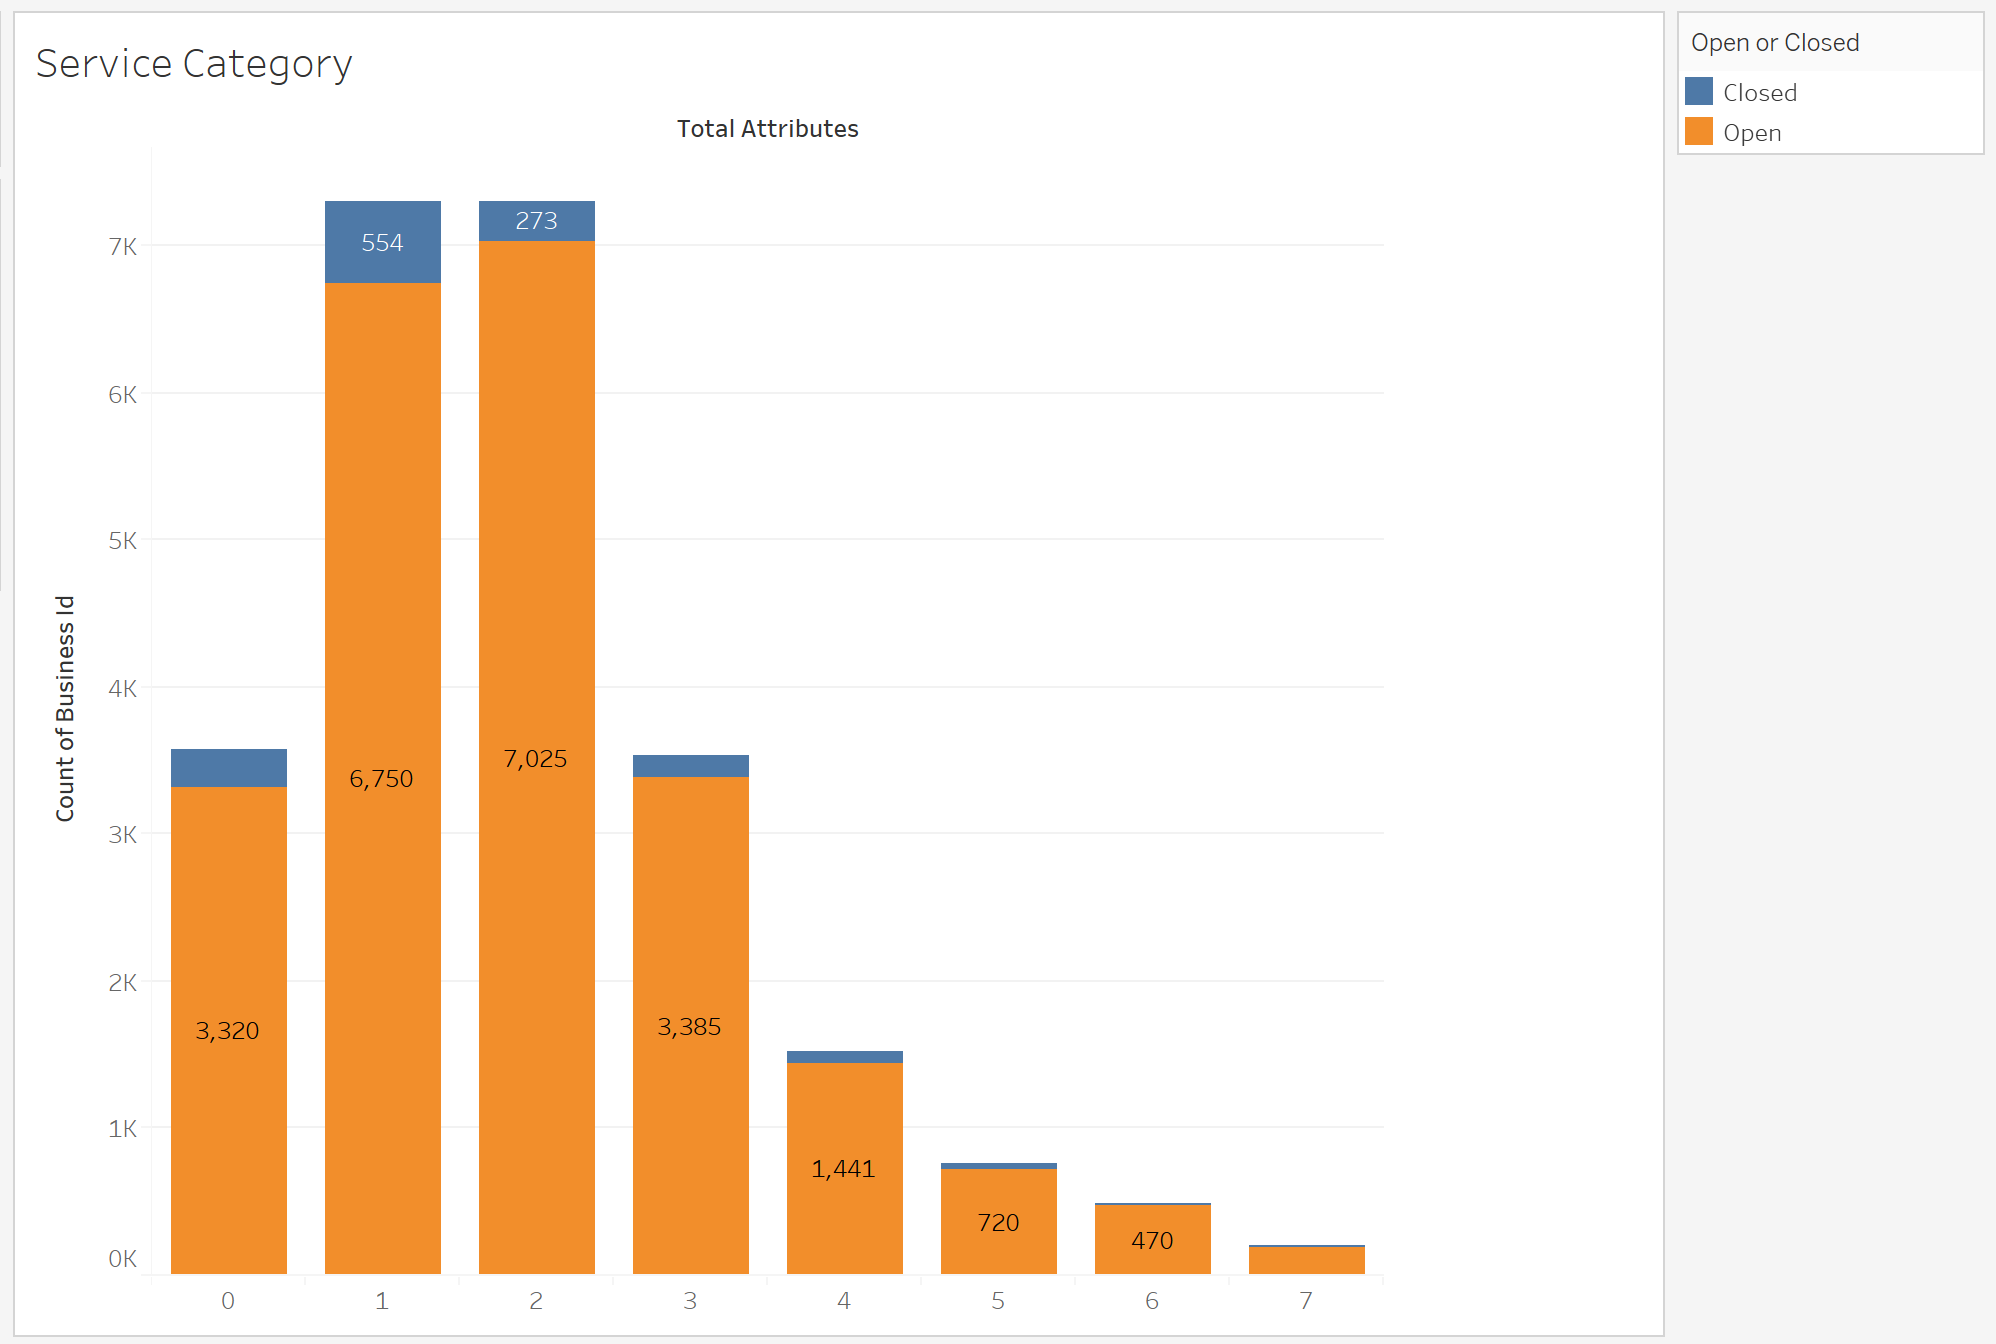

# Conclusion

### Question 1
With the results we acquired from breaking down each segment of the question, our group concluded that there is a strong correlation with restaurants for each visualization. Shopping, arts & entertainment, and home & local services did not show a strong relationship with the volume of reviews and the length of time since the first review of the business.

After formulating our data and carefully analyzing the result of Tableau, we believe that the sweet spot is around 19-20 attributes (majority of restaurant attr).

### Question 2
The length of time could matter for restaurants. Our team believes that restaurants that have been established for a long time on yelp would have a increase in attributes. We believe the longer your restaurant has been opened, more reviews would accumulate, which would then lead to the restaraunt taking more care of their yelp page.

For the other categories, there was not a strong increase over time. The average did not change and stayed relatively close to each other even in the later years.


### Question 3
For the third part of the question, there is a strong correlation with the amount of businesses that have filled out their attributes whether they are still open or closed.  We have concluded that restaurants that are still open do have more attributes filled out compared to the restaurants that closed. Businesses that have their attributes filled are less likely to close. 


